In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io

In [5]:
if os.path.exists("C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv"):  #  "C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv"
    es = pd.read_csv("C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv", index_col= 0)
else:
    es = yf.Ticker("C:\August2022\ES 12-22 Globex_2022_09_21amended21.csv")
    es.to_csv("ES_Aug_21_2022_Amended.csv")

In [4]:
es.to_csv("ES_Aug_21_2022_Amended.csv")  # save local version

### Derive basic time metrics columns and convert categorical to numerical

In [6]:
mapping = {'AtBid': -1, 'AtAsk': 1, 'BelowBid': -2, 'AboveAsk': 2, 'BetweenBidAsk':0 }   # remap categorical ---->  ints 
es = es.replace({'BidAsk': mapping})

In [7]:
es.loc['2022-09-21 09:20:00.900' : '2022-09-21 09:50:00.900'].head(5)


Vol  BidAsk      Bid     Ask   Price
DateTime                                                     
2022-09-21 09:20:01.392    1       1  3893.75  3894.0  3894.0
2022-09-21 09:20:01.392    1       1  3893.75  3894.0  3894.0
2022-09-21 09:20:01.392    1       1  3893.75  3894.0  3894.0
2022-09-21 09:20:01.392    1       1  3893.75  3894.0  3894.0
2022-09-21 09:20:01.392    1       1  3893.75  3894.0  3894.0

In [11]:
es.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price'], dtype='object')

In [9]:
es = es.rename(columns={"Price ": 'Close'} )  # rename to remove space at end of from "Price " 

In [10]:
es.dtypes
type(es.index)

pandas.core.indexes.base.Index

In [13]:
es['Time'] = pd.to_datetime(es.index, format='%Y-%m-%d %H:%M:%S.%f')   #[4:-1] # make column Time

In [14]:
es.index = pd.to_datetime(es.index, format='%Y-%m-%d %H:%M:%S.%f') # convert index to datetime type

In [15]:
es.dtypes

Vol                int64
BidAsk             int64
Bid              float64
Ask              float64
Price            float64
Time      datetime64[ns]
dtype: object

In [16]:
es['Time']

DateTime
2022-09-21 00:00:00.720   2022-09-21 00:00:00.720
2022-09-21 00:00:00.720   2022-09-21 00:00:00.720
2022-09-21 00:00:00.900   2022-09-21 00:00:00.900
2022-09-21 00:00:00.900   2022-09-21 00:00:00.900
2022-09-21 00:00:00.900   2022-09-21 00:00:00.900
                                    ...          
2022-09-21 23:59:55.028   2022-09-21 23:59:55.028
2022-09-21 23:59:55.032   2022-09-21 23:59:55.032
2022-09-21 23:59:55.032   2022-09-21 23:59:55.032
2022-09-21 23:59:55.032   2022-09-21 23:59:55.032
2022-09-21 23:59:57.008   2022-09-21 23:59:57.008
Name: Time, Length: 1814632, dtype: datetime64[ns]

In [17]:
es.head()

Vol  BidAsk      Bid      Ask    Price  \
DateTime                                                          
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   

                                           Time  
DateTime                                         
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720  
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900

In [18]:
es['Hour'] = es['Time'].dt.hour
es['Minute'] = es['Time'].dt.minute
es['Second'] = es['Time'].dt.second
es['Msec'] = es['Time'].dt.microsecond.astype(str).str.replace('000', '').astype(int) # es['M'] = es['Time'].dt.microsecond # es['M'] = es['M'].astype(str) # es['M'] = es['M'].str.replace('000', '') # es['M'] = es['M'].astype(int)


In [20]:
es.head()

Vol  BidAsk      Bid      Ask    Price  \
DateTime                                                          
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   

                                           Time  Hour  Minute  Second  Msec  
DateTime                                                                     
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720     0       0       0   720  
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720     0       0       0   720  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900  
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900

In [21]:
es.to_csv("ES_Aug_21_2022_Time2.csv")

In [75]:
# es1 = es.copy() 
es1.head(5)

Vol  BidAsk      Bid      Ask    Price  \
DateTime                                                          
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720     0       0       0   720   
2022-09-21 00:00:00.720 2022-09-21 00:00:00.720     0       0       0   720   
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900   
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900   
2022-09-21 00:00:00.900 2022-09-21 00:00:00.900     0       0       0   900   

                         Vol_avg100  Vol_sum100  B_A_CumSum  STD_200  AVG_200  \
DateTime                                                                        
2022-09-21 00:00:00.720         NaN         NaN          -1      NaN      NaN   
2022-09-21 00:00:00.720         NaN         NaN          -2      NaN      NaN   
2022-09-21 00:00:00.900         NaN         NaN          -1      NaN      NaN   
2022-09-21 00:00:00.900         NaN         NaN           0      NaN      NaN   
2022-09-21 00:00:00.900         NaN         NaN           1      NaN      NaN   

                         Price_R_BA_V  BA_Price_V  Price_Target  
DateTime                                                         
2022-09-21 00:00:00.720           NaN    -3879.50        3876.5  
2022-09-21 00:00:00.720           NaN    -3879.50        3876.5  
2022-09-21 00:00:00.900           NaN     3879.75        3876.5  
2022-09-21 00:00:00.900           NaN     3879.75        3876.5  
2022-09-21 00:00:00.900           NaN     3879.75        3876.5

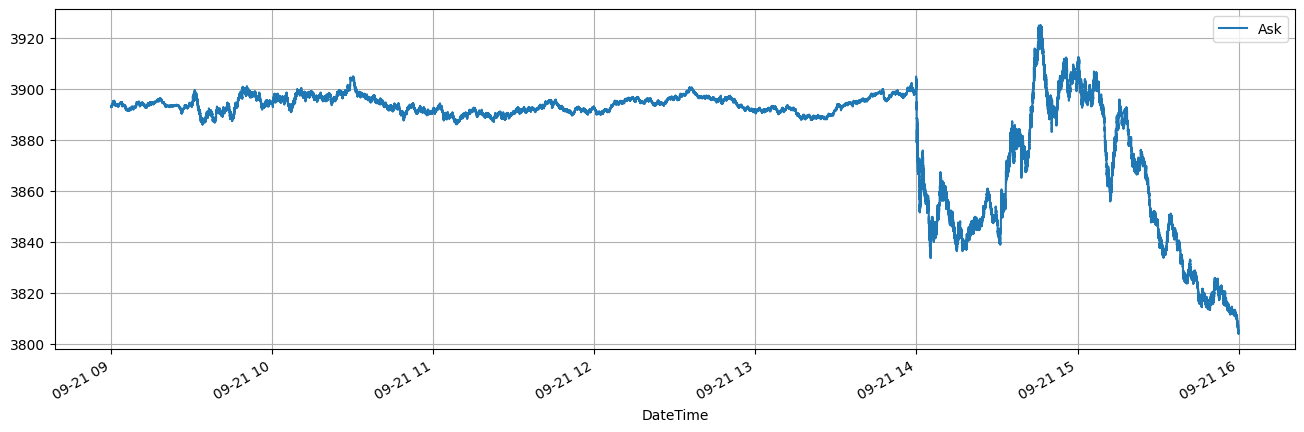

In [658]:
es1["2022-09-21 09:00:00":"2022-09-21 16:00:00"].plot( y='Ask', figsize=(16,5)) # normal Price plot 7 am to 4 pm
plt.grid()

### Aditional ideas for derived features

In [133]:
# del es1['Vol_sum100'] 
es1['Vol_avg100'] = es1['Vol'].rolling(100).mean()   
es1['Vol_Cum_sum100'] = es1['Vol'].cumsum()  


es1['B_A_CumSum'] = es1['BidAsk'].cumsum()  # cumulative sum delta of Bid/Ask

Derivatives of Price

In [ ]:
es1['STD_200'] = es1['Bid'].rolling(200).std()  # std every 200 rows
es1['AVG_200'] = es1['Price'].rolling(200).mean() # mean every 200 rows
es1['AVG_200_Vol'] = es1['Vol'].rolling(200).mean() #  Vol mean every 200 rows
es1['Price_R_BA_V'] = es1['Price'] * es1['STD_200'] / (es1['AVG_200']) #  200 rows calc of Price * STD / mean ratio
es1['BA_Price_V'] = es1['BidAsk'] * es1['Price'] / es1['Vol'] 
#-------------------------- Moving Averages
es1['STD20K'] = es1['Price'].rolling(20000).std()
es1['MA30K'] = es1['Price'].rolling(30000).mean() 
es1['MA50K'] = es1['Price'].rolling(50000).mean() 
es1['MA70K'] = es1['Price'].rolling(70000).mean() 
es1['MA100K'] = es1['Price'].rolling(100000).mean() 
es1['MA200K'] = es1['Price'].rolling(200000).mean() 
es1['MA300K'] = es1['Price'].rolling(300000).mean() 
#----------------------------------- Derivatives from MA, Vol, variation, mean, Vol
es1['Var_Vol_100K'] = es1['Price'].rolling(100000).var() / es1['Price'].rolling(100000).mean()
es1['Var_MinMax_MA20K'] = es1['Price'].rolling(20000).var()   *  es1['Price'].rolling(20000).min()  / es1['Price'].rolling(20000).max() 
es1['Var_ver'] = es1['Price'].rolling(20000).var() / es1['Price'].rolling(10000).var()
# -------------------------- BidAsk * Volume / mean of interval
es1['BA_Vol_Avg40K'] = es1['BidAsk'].rolling(40000).var() *  es1['BidAsk'].rolling(40000).sum()  * es1['Vol'].rolling(40000).mean() 
es1['BA_BA_Avg40K'] = es1['BidAsk'].rolling(40000).var() *  es1['BidAsk'].rolling(40000).sum()  * es1['BidAsk'].rolling(40000).mean() 
#-------------------------- adding rolld 5T Volume summed
es1['5_val'] = es1.rolling('5T').Vol.sum() # (1814632,) 
#-------------- shifted Price_Target  and Price_Target5 columns 
es1['Price_Target'] = es1['Price'].shift(8000)  #  amounts to some 30 seconds of avr ticks (transactions) for 5 min we need greater amount of avg ticks, like 80,000
es1['Price_Target5'] = es1['Price'].shift(80000) # about 5 min shift

In [656]:
es1.shape   # (1814632, 32)    1814632 ticks ; 144 5min intervals in 24 hrs; aprox 12,600 for each 5 min intervals; we will want calculations each 12,600 ticks to consider intervals of 5 min on avg. 
es1.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Time', 'Hour', 'Minute',
       'Second', 'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm',
       'STD20K', 'MA30K', 'MA50K', 'MA70K', 'MA100K', 'MA200K', 'MA300K',
       'Var_Vol_100K', 'Var_MinMax_MA20K', 'Var_ver'],
      dtype='object')

In [748]:
pd.set_option('display.max_columns', None) # display all columns
es1.sample(3)

Vol  BidAsk      Bid     Ask    Price  \
DateTime                                                         
2022-09-21 15:50:57.448    1       2  3819.75  3822.0  3822.00   
2022-09-21 15:09:42.332    1      -2  3888.75  3890.0  3888.75   
2022-09-21 14:17:04.652    1      -1  3837.75  3838.0  3837.75   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 15:50:57.448 2022-09-21 15:50:57.448    15      50      57   448   
2022-09-21 15:09:42.332 2022-09-21 15:09:42.332    15       9      42   332   
2022-09-21 14:17:04.652 2022-09-21 14:17:04.652    14      17       4   652   

                         Vol_avg100  B_A_CumSum   STD_200     AVG_200  \
DateTime                                                                
2022-09-21 15:50:57.448        1.45      -51218  0.000000  3821.07375   
2022-09-21 15:09:42.332        1.51      -38509  0.513749  3889.67250   
2022-09-21 14:17:04.652        1.11      -30845  0.289808  3837.52000   

                         Price_R_BA_V  BA_Price_V  Price_Target  \
DateTime                                                          
2022-09-21 15:50:57.448      0.000000     7644.00        3818.5   
2022-09-21 15:09:42.332   1368.385534    -7777.50        3893.5   
2022-09-21 14:17:04.652   1049.254894    -3837.75        3843.5   

                         Price_Target5  AVG_200_Vol  Vol_Cum_sum100  \
DateTime                                                              
2022-09-21 15:50:57.448        3834.25         1.48         2075225   
2022-09-21 15:09:42.332        3900.25         1.46         1699866   
2022-09-21 14:17:04.652        3852.75         1.06         1188139   

                         Scld_Price  Scaled_B_A_CmSm    STD20K        MA30K  \
DateTime                                                                      
2022-09-21 15:50:57.448   -1.372372        -1.430355  2.013364  3817.383708   
2022-09-21 15:09:42.332    0.659692        -0.667497  4.732604  3897.629358   
2022-09-21 14:17:04.652   -0.894239        -0.207465  2.890625  3842.691008   

                               MA50K        MA70K       MA100K       MA200K  \
DateTime                                                                      
2022-09-21 15:50:57.448  3818.802880  3821.126725  3825.599433  3839.345522   
2022-09-21 15:09:42.332  3897.421580  3899.547204  3900.912827  3902.293874   
2022-09-21 14:17:04.652  3846.357505  3850.086982  3850.740008  3852.997095   

                              MA300K  Var_Vol_100K  Var_MinMax_MA20K  \
DateTime                                                               
2022-09-21 15:50:57.448  3852.025712      0.019173          4.044356   
2022-09-21 15:09:42.332  3896.077433      0.007176         22.294345   
2022-09-21 14:17:04.652  3866.435890      0.015056          8.330201   

                          Var_ver  BA_Vol_Avg40K  BA_BA_Avg40K    5_val  
DateTime                                                                 
2022-09-21 15:50:57.448  1.846104    -958.580627     10.342070  43808.0  
2022-09-21 15:09:42.332  6.377301   -6156.012905    610.557196  32345.0  
2022-09-21 14:17:04.652  1.426153   -3045.891258    125.349065  48591.0

#### IDE

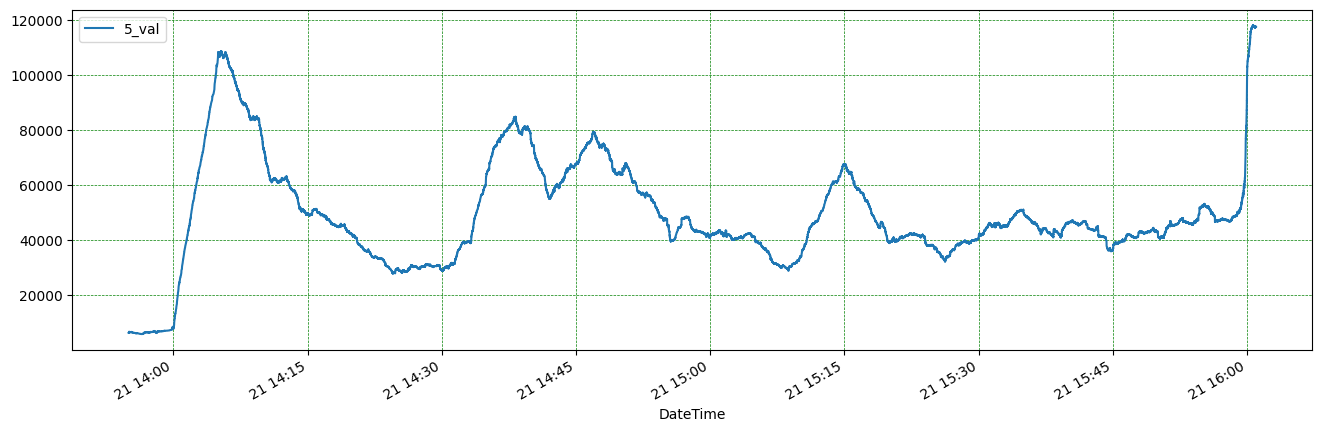

In [755]:
es1["2022-09-21 13:55":"2022-09-21 16:00"].plot( y='5_val' , figsize=(16,5))    # Interesting: Vol over 5T ploted over 2 hrs of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5) 

Very Interesting derivative 

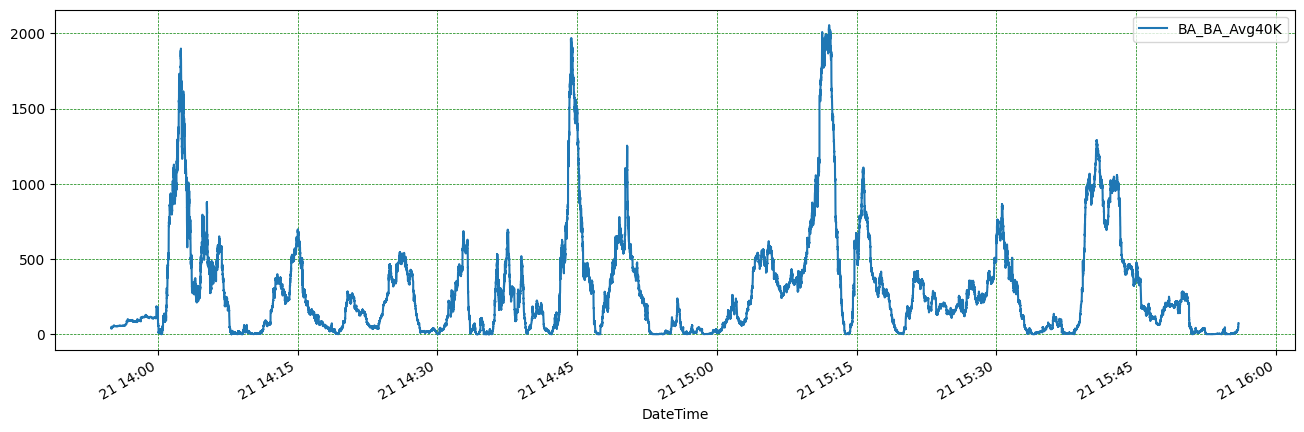

In [681]:
es1["2022-09-21 13:55":"2022-09-21 15:55"].plot( y='BA_BA_Avg40K' , figsize=(16,5))    # Very Interesting: BidAsk var * BA sum * BA mean ploted over 2 hrs of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5) 

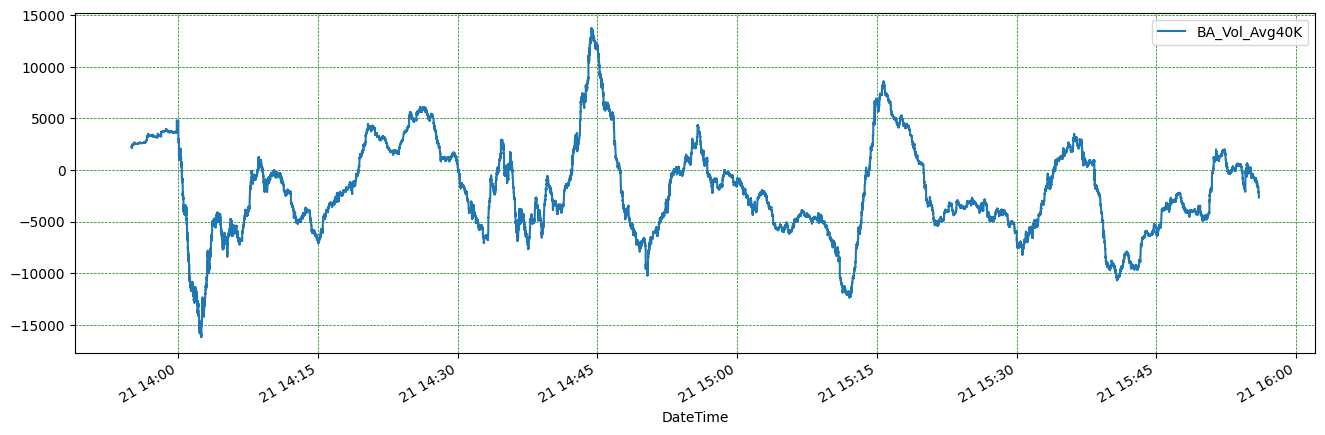

In [680]:

es1["2022-09-21 13:55":"2022-09-21 15:55"].plot( y='BA_Vol_Avg40K' , figsize=(16,5))    # Very Interesting: BidAsk var * BA sum * Vol mean ploted over 2 hrs of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)  

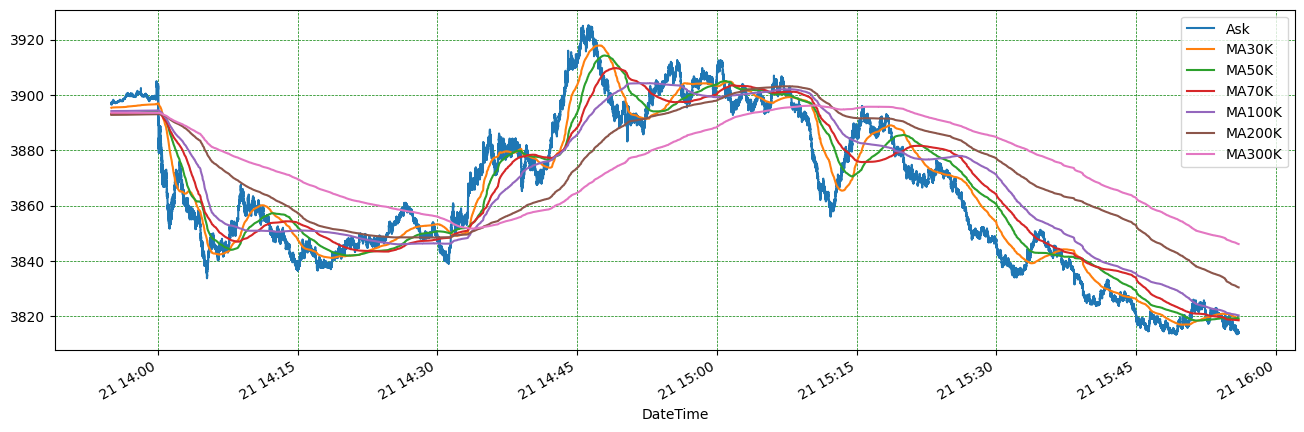

In [661]:
es1["2022-09-21 13:55":"2022-09-21 15:55"].plot( y=['Ask', 'MA30K','MA50K','MA70K', 'MA100K','MA200K','MA300K' ], figsize=(16,5))    # 6 Ma ploted over 2 hrs of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

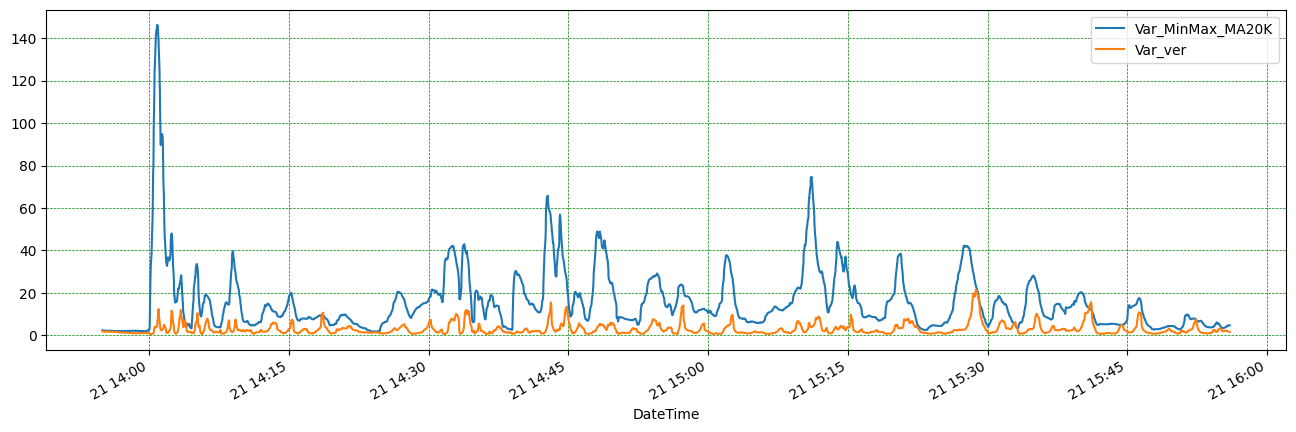

In [662]:
es1["2022-09-21 13:55":"2022-09-21 15:55"].plot( y=['Var_MinMax_MA20K', 'Var_ver' ], figsize=(16,5))    # Interesting: 2 deriv ativ features Ma ploted over 2 hrs of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Var_MinMax_MA20K shows remarkable increases, but that is not odd considering the volatile moves. This feature is direct translation of the Variation, Min.Max over intervals. They do coincide w Price and Price is direct result of those inflections. With more modest magnitude Ver_Var also does the same. 
Try multiplying with Volume. TBD 

Assumption is that large Spikes (Outliers) in many features are a footprint of 'BigMoney' transacting. 

In [754]:
es1.loc['2022-09-21 14:00:00':].head(5) # checking middle of frame
es1.sample(3)

Vol  BidAsk      Bid      Ask    Price  \
DateTime                                                          
2022-09-21 14:39:37.248    1       1  3878.50  3878.75  3878.75   
2022-09-21 07:30:20.708    1      -1  3879.25  3879.50  3879.25   
2022-09-21 10:38:24.364    1       1  3895.75  3896.00  3896.00   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 14:39:37.248 2022-09-21 14:39:37.248    14      39      37   248   
2022-09-21 07:30:20.708 2022-09-21 07:30:20.708     7      30      20   708   
2022-09-21 10:38:24.364 2022-09-21 10:38:24.364    10      38      24   364   

                         Vol_avg100  B_A_CumSum   STD_200     AVG_200  \
DateTime                                                                
2022-09-21 14:39:37.248        1.02      -32898  0.306891  3878.76125   
2022-09-21 07:30:20.708        1.24       -5938  0.258414  3879.35875   
2022-09-21 10:38:24.364        1.44      -10760  0.180517  3896.00000   

                         Price_R_BA_V  BA_Price_V  Price_Target  \
DateTime                                                          
2022-09-21 14:39:37.248   1178.566084     3878.75        3867.0   
2022-09-21 07:30:20.708    831.909815    -3879.25        3884.5   
2022-09-21 10:38:24.364    517.127924     3896.00        3896.5   

                         Price_Target5  AVG_200_Vol  Vol_Cum_sum100  \
DateTime                                                              
2022-09-21 14:39:37.248        3868.75        1.010         1404546   
2022-09-21 07:30:20.708        3867.00        1.205          152085   
2022-09-21 10:38:24.364        3899.75        1.360          539020   

                         Scld_Price  Scaled_B_A_CmSm    STD20K        MA30K  \
DateTime                                                                      
2022-09-21 14:39:37.248    0.323505        -0.330696  5.371301  3877.926925   
2022-09-21 07:30:20.708    0.345917         1.287579  2.362077  3880.183125   
2022-09-21 10:38:24.364    0.838991         0.998138  1.051542  3899.061750   

                               MA50K        MA70K       MA100K       MA200K  \
DateTime                                                                      
2022-09-21 14:39:37.248  3878.193465  3878.156857  3873.414197  3860.145907   
2022-09-21 07:30:20.708  3878.085090  3874.888657  3872.745595          NaN   
2022-09-21 10:38:24.364  3898.588870  3898.156496  3897.541855  3895.483516   

                              MA300K  Var_Vol_100K  Var_MinMax_MA20K  \
DateTime                                                               
2022-09-21 14:39:37.248  3857.081117      0.020635         28.707890   
2022-09-21 07:30:20.708          NaN      0.013522          5.563253   
2022-09-21 10:38:24.364  3893.518171      0.001602          1.104251   

                          Var_ver  BA_Vol_Avg40K  BA_BA_Avg40K    5_val  
DateTime                                                                 
2022-09-21 14:39:37.248  1.504780    -637.844261      4.954708  81119.0  
2022-09-21 07:30:20.708  1.900122   -1655.774799     34.304864   1023.0  
2022-09-21 10:38:24.364  2.584163   -3558.847355    133.809423  17415.0

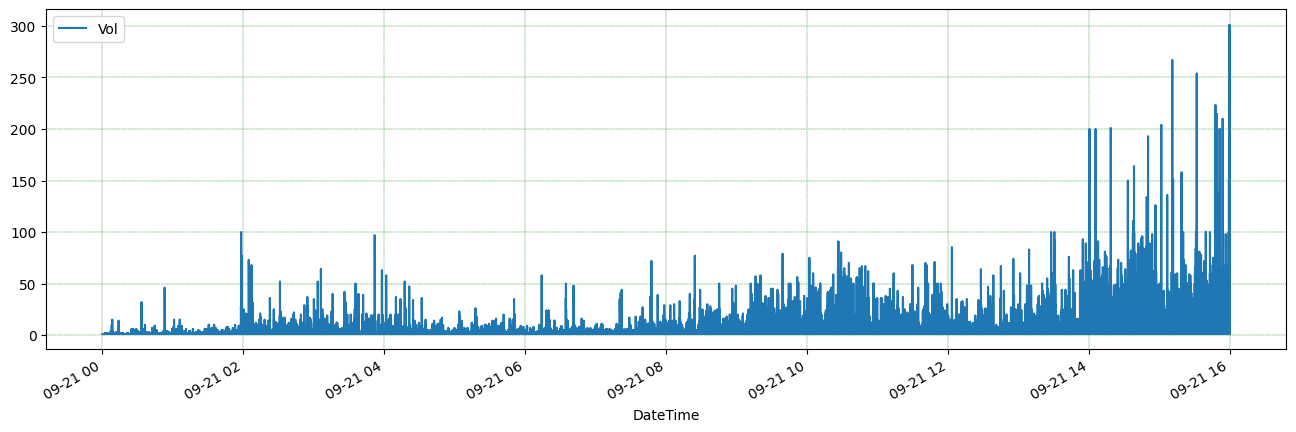

In [153]:
es1["2022-09-21 00:00:00":"2022-09-21 16:00:00"].plot( y='Vol', figsize=(16,5))  # volume througout the day
plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

Divide in 2 the most volatile rollercoaster moves during the last 2 hours: part I and II

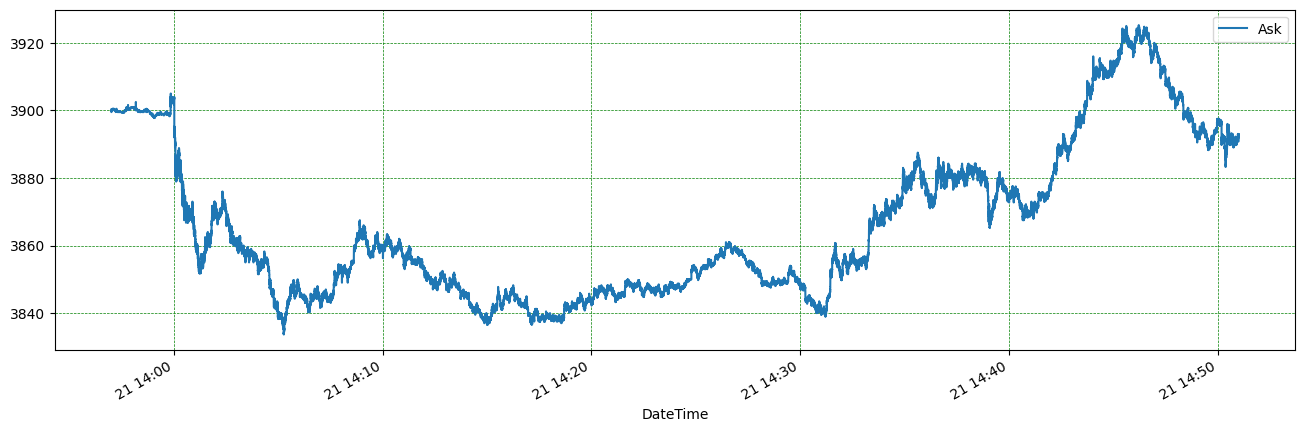

In [152]:
es1["2022-09-21 13:57":"2022-09-21 14:50"].plot( y='Ask', figsize=(16,5))    #  part I of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

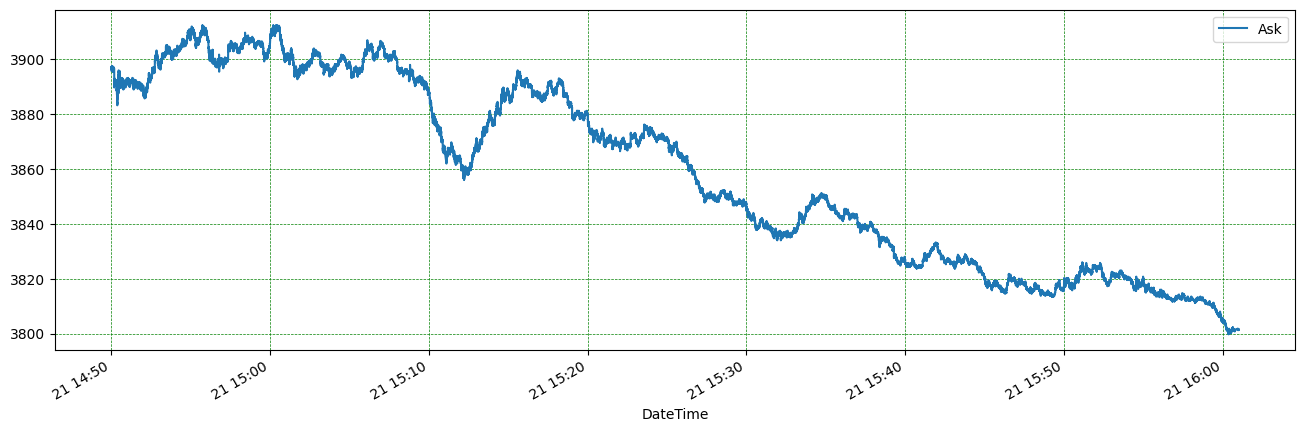

In [151]:
es1["2022-09-21 14:50":"2022-09-21 16:00"].plot( y='Ask', figsize=(16,5))    #  part II of the Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

TBD: Are inflection points in the Vol_avg100 indicative of future Price changes? 

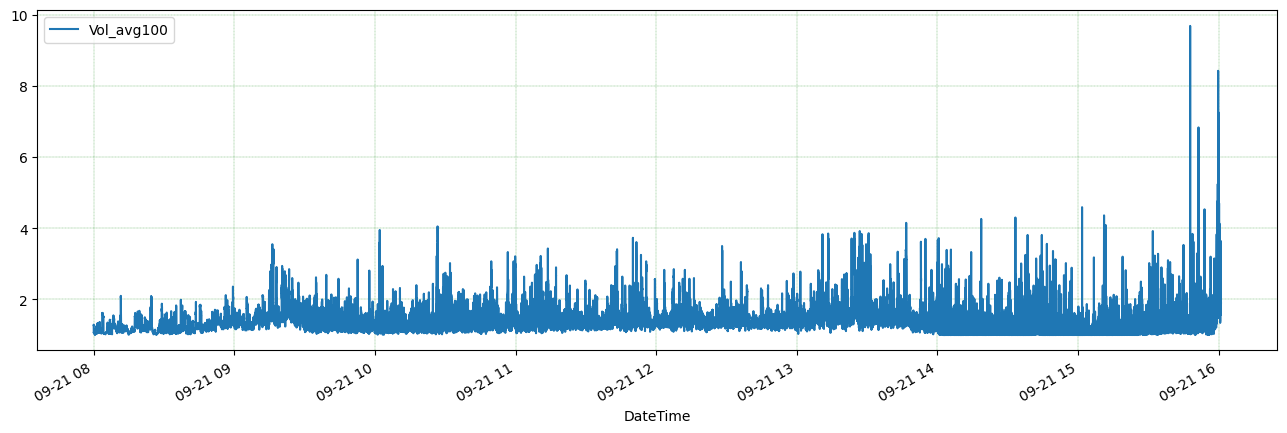

In [154]:
es1["2022-09-21 08:00":"2022-09-21 16:00"].plot( y='Vol_avg100', figsize=(16,5)) # part I (and before) of the  on Volume mean of 100 last ticks
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

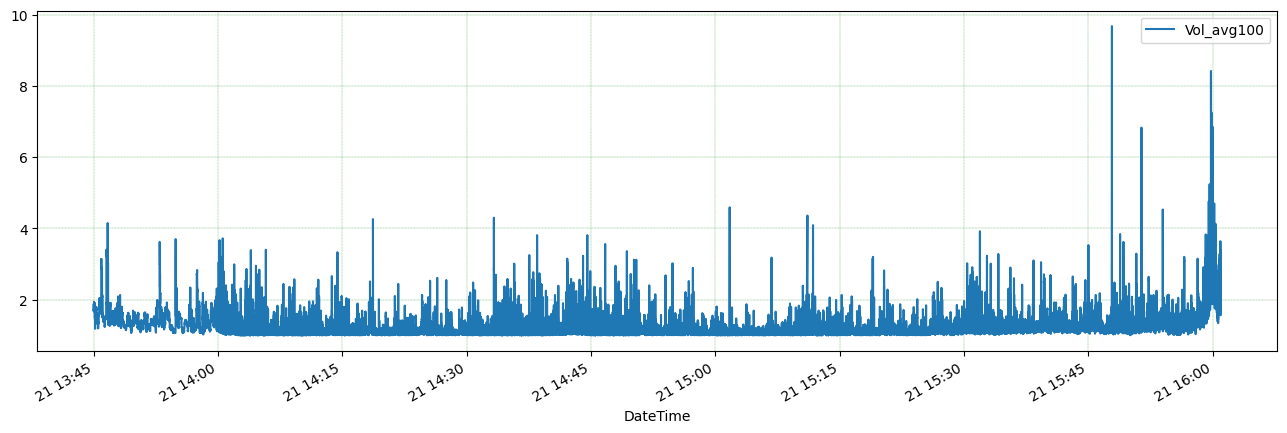

In [156]:
es1["2022-09-21 13:45":"2022-09-21 16:00"].plot( y='Vol_avg100', figsize=(16,5)) # part II of on Volume mean of 100 last ticks
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

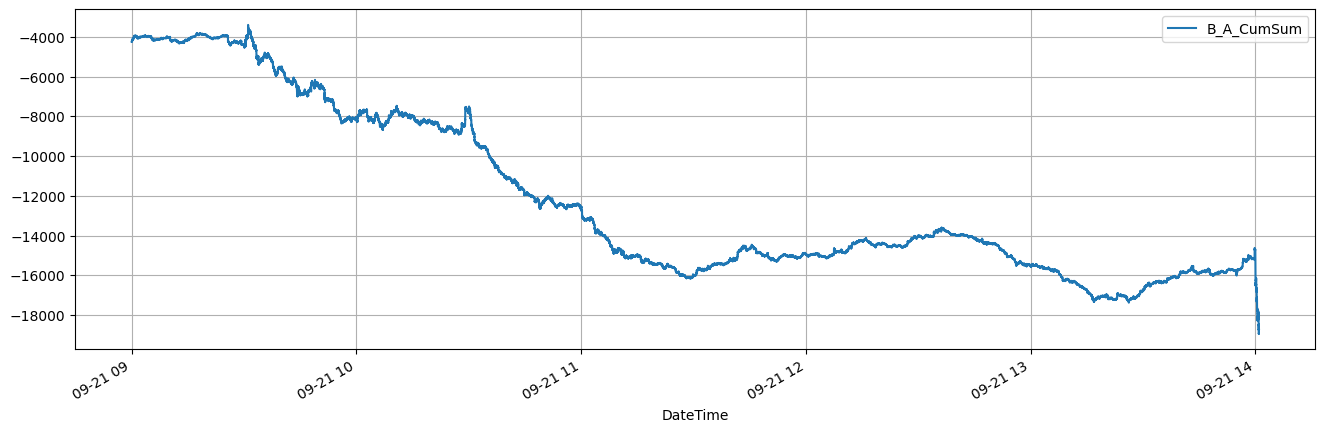

In [148]:
es1["2022-09-21 09:00":"2022-09-21 14:00"].plot( y='B_A_CumSum', figsize=(16,5))  # from start of day constant decline of cummulative BidAsk Delta before the Volatility of part I and II in 
plt.grid()

In [ ]:
# from IPython.display import Image
# Image(url="C://Users/tonya//Pictures//errors//ES_2022-10-19.jpg", width=1160, height=300)

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 5))

# # Set axis ranges; by default this will put major ticks every 25.
# ax.set_xlim(0, 200)
# ax.set_ylim(0, 200)

# # Change major ticks to show every 20.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.yaxis.set_major_locator(MultipleLocator(20))

# # Change minor ticks to show every 5. (20/4 = 5)
# ax.xaxis.set_minor_locator(AutoMinorLocator(4))
# ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# # Turn grid on for both major and minor ticks and style minor slightly
# # differently.
# ax.grid(which='major', color='#CCCCCC', linestyle='--')
# ax.grid(which='minor', color='#CCCCCC', linestyle=':')

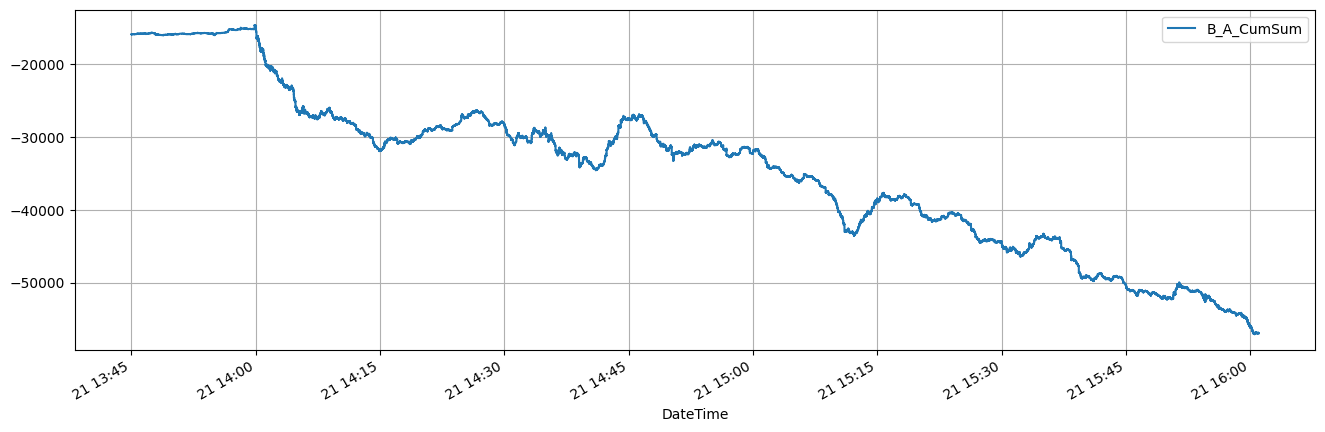

In [176]:
es1["2022-09-21 13:45":"2022-09-21 16:00"].plot( y='B_A_CumSum', figsize=(16,5))  # part II of the Volatility on last 100 ticks B_A_CumSum ratio 
# 14:40-14:45; 14:15-14:27; 15:10-15:15 there is steady increase of this ratio. What does Price do at that time?
plt.grid()
plt.show()

Q: 14:40-14:45; 14:15-14:27; 15:10-15:15 there is steady increase of this ratio. What does Price do at that time?
A: about 85% decisive move up.
Conclusions: eventhough Delta continuosly drops, sporadic bursts of B_A_CumSum ratio push Price Upward, disproportionately more then the recovery of Delta. Possible predictive triger: if B_A_CumSum ratio declines, eventhough Price advances, chances are that the moves, in this example eventhough spectacularly large, are still part of a obscuring/hiding the eventual final direction of the move. In this instance its striking how 10-15% advance in B_A_CumSum ratio can produce 120% advancement of Price Upward (from daily move) only to return to a steady (already seen) decline of Price, correlated to eachother for the final Destination- super low end of day. 
TBExamined further!   (TBEF)

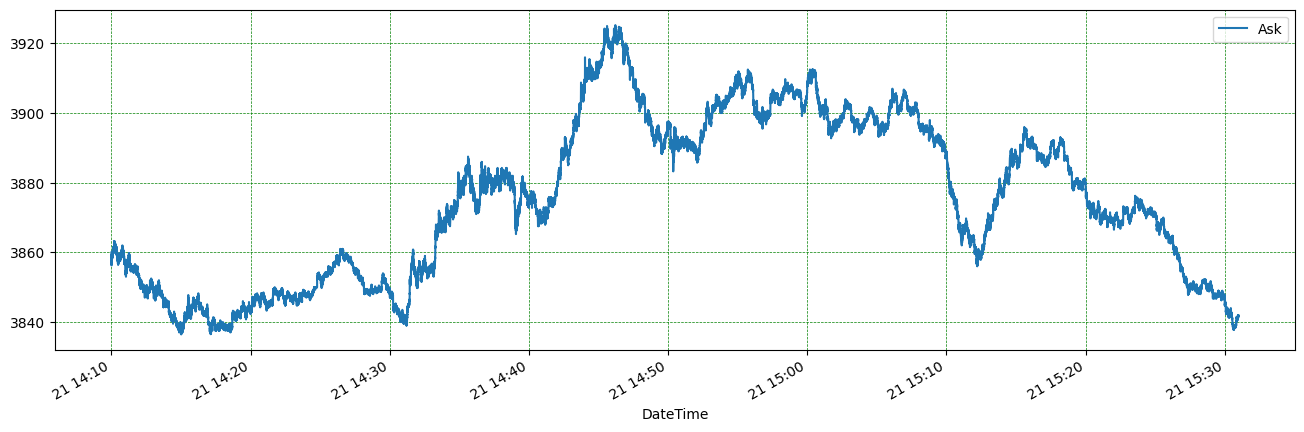

In [177]:
es1["2022-09-21 14:10":"2022-09-21 15:30"].plot( y='Ask', figsize=(16,5))    #  part II Zoomed of the Volatile move w grid
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


Standarizing 2 vars to plot 

In [178]:
from sklearn.preprocessing import StandardScaler

In [247]:
scaler = StandardScaler()
scaled_tst4Corr = scaler.fit_transform(pd.DataFrame(es1[['Ask', 'B_A_CumSum']]))

In [262]:
es1['Scld_Price'] = scaler.fit_transform(pd.DataFrame(es1['Ask']))
es1['Scaled_B_A_CmSm'] = scaler.fit_transform(pd.DataFrame(es1['B_A_CumSum']))

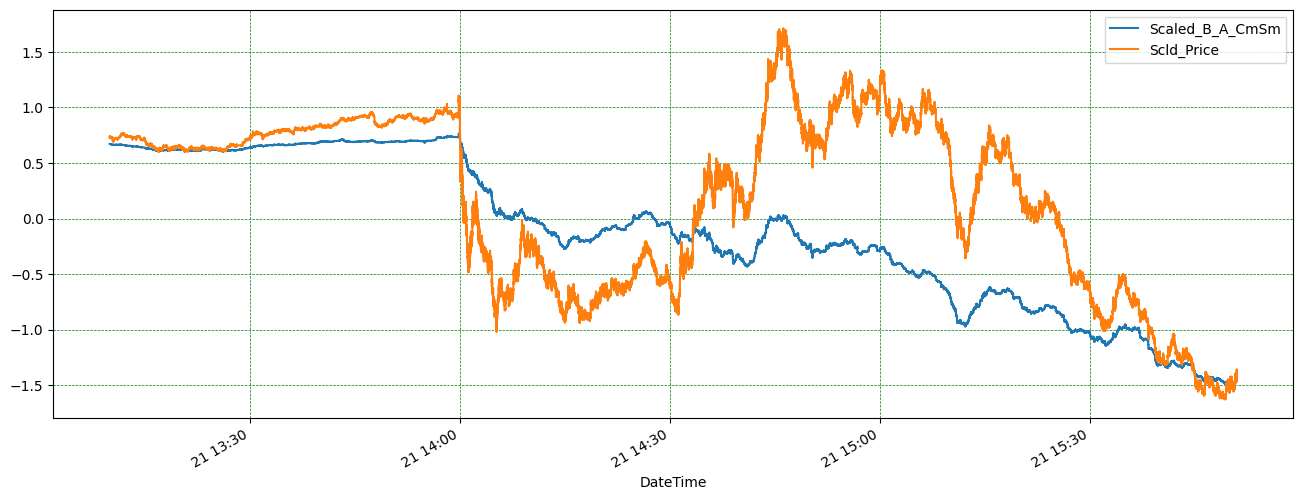

In [265]:
es1["2022-09-21 13:10":"2022-09-21 15:50"].plot( y=['Scaled_B_A_CmSm','Scld_Price' ], figsize=(16,6))    # Interesting: part II of the most Volatile move
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Findings: There is correlation between Delta B_A_CumSum and Price. However, the ratio of increase is disproportional, in this extreme example. While Price advances at 14:30 in the extremes, there is still a static or moderate increase of BidAsk ratio. That could be a footprint of a ShortSqueeze: when shares change hands, from retail to intitutional: if retail tr. generally expected downturn direction and positioned shorts, InstitutionalFunds (IF) are rasing the Price, chasing retailers from shorts, on smaller Volume, retailers raise the Price while liquidating their loosing short positions, while IF aquare that liquidity, positioning into Longs and Shorts, all in a span of 15 minutes; only to slam Price and reconfirm the downward trend, initially correctly imagined by retailers (yet at the end mostly without as large retail participation), within the next 1:30 min.   
The chart of line intersection may also be a Triger for ShortSqueeze in action. TBFE 

Showing the Price_Target vs Price shifted in future 30 seconds and 5 min

<AxesSubplot: xlabel='DateTime'>

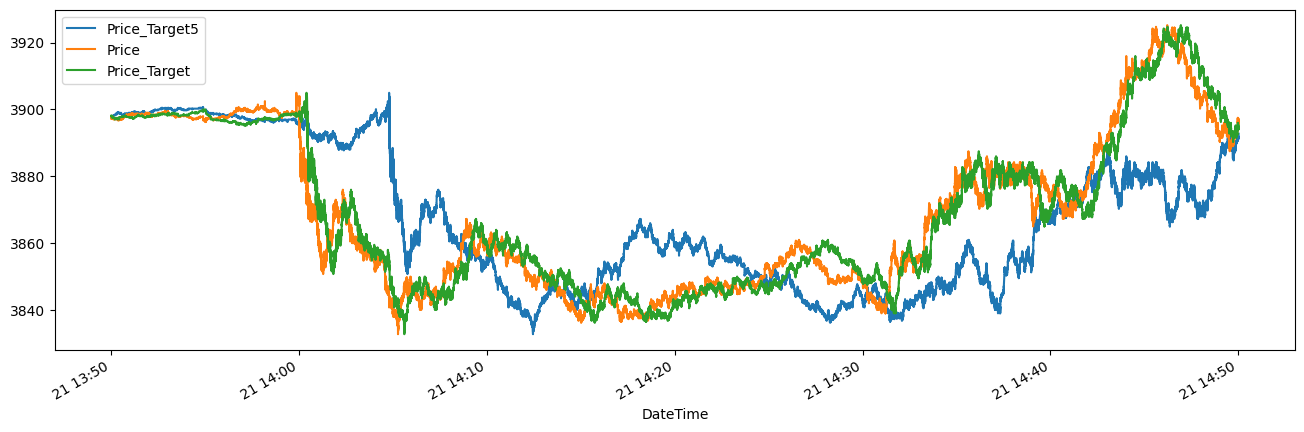

In [91]:

es1["2022-09-21 13:50:00":"2022-09-21 14:50:00"].plot( y= ['Price_Target5','Price', 'Price_Target'], figsize=(16,5))  
#  Target_Price shifted aprox 30 sec; Target_Price5 shifted 5 min into the future

Observation: Once Price falls unusual 60 pnts within 5 minutes, a spectacular volatility, and "settles" within a 45 pnts range for 25-30 min, it brakes Upward, climbing almost 100 pnts (from lowest point) within 15 min, even more volatile Upward move, only to slam it down "All Force", some 120+ points within the last 1:10 hr of trading. Why? Is there any particular signature as to: Spread (variation), mean, Volume, Time during which these changes occured?    

In [650]:
es1.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Time', 'Hour', 'Minute',
       'Second', 'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm'],
      dtype='object')

14:18 and 14:34 Big Spikes  in Vol_avg100 aggregate of 100 ticks Volume, 

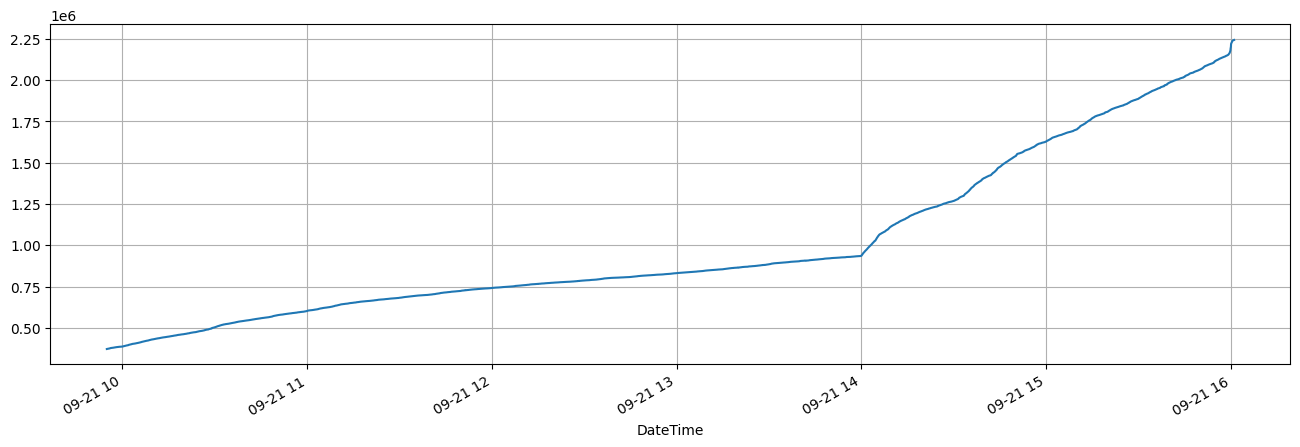

In [299]:
es1["2022-09-21 09:55":"2022-09-21 16:00"]['Vol_Cum_sum100'].plot( figsize=(16,5)) 
plt.grid()

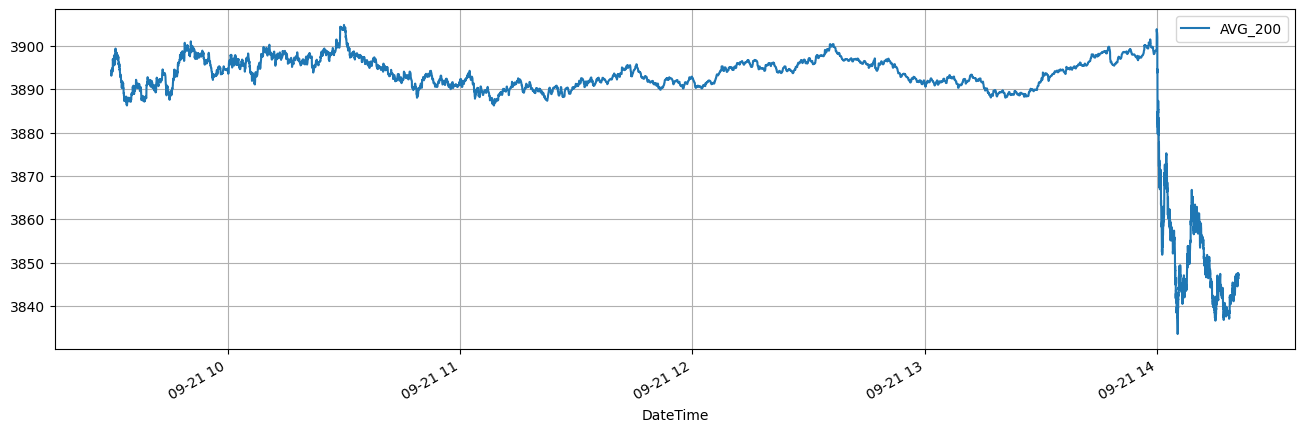

In [301]:
es1["2022-09-21 09:30":"2022-09-21 14:20"].plot( y= 'AVG_200', figsize=(16,5)) # AVG_200 
plt.grid()

Possible Lead: High Price_R_BA_V on 14:47 and 15:02 may indicate greater participation of 'Big Money' - remains to be seen how Price_R_BA_V may relate to it. During the ensuing Price decline, there is intense greater Price_R_BA_V Spread, which settles towards the end with another (end-of-day Volume settling) Spike at 15:55 after which another 20 pnts decline. 


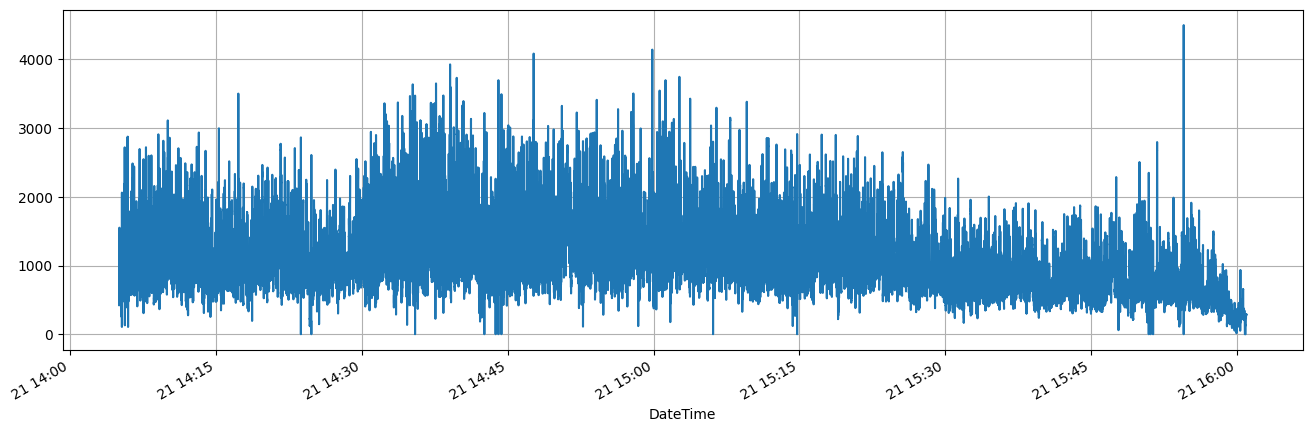

In [294]:
es1["2022-09-21 14:05":"2022-09-21 16:00"]['Price_R_BA_V'].plot( y='Ask', figsize=(16,5)) # plot in volatile hour from 200 rows calc of Price * STD / mean  ratio
plt.grid()

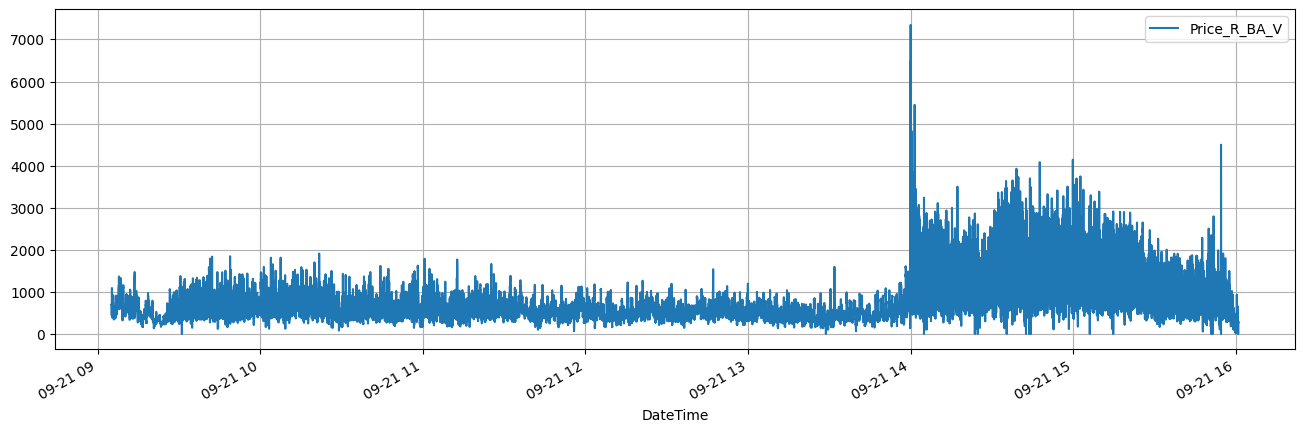

In [302]:
es1["2022-09-21 09:05":"2022-09-21 16:00"].plot( y='Price_R_BA_V', figsize=(16,5)) # plot in volatile hour of Price_R_BA_V
plt.grid()

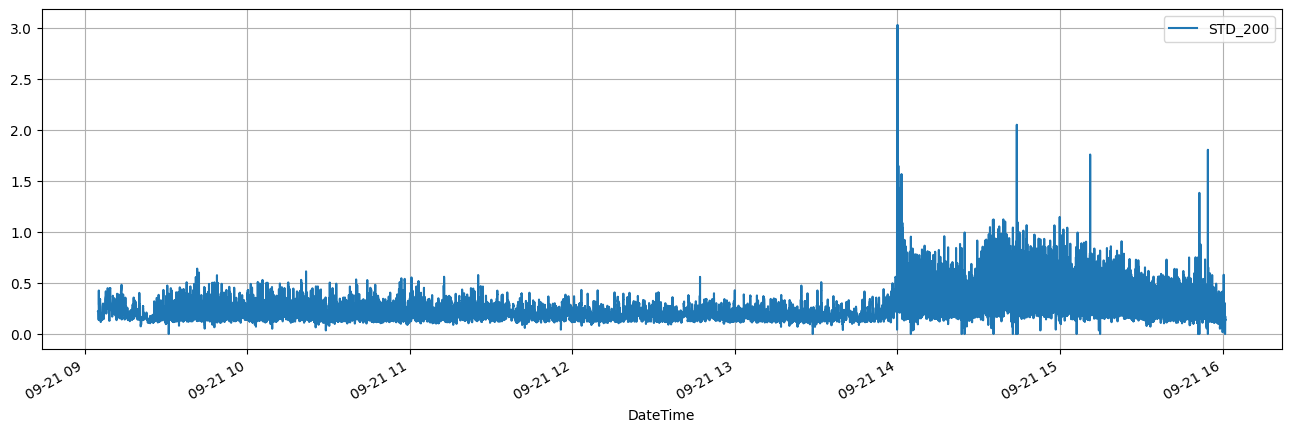

In [293]:
es1["2022-09-21 09:05":"2022-09-21 16:00"].plot( y=['STD_200'], figsize=(16,5)) # plot in volatile hour of STD_200
plt.grid()

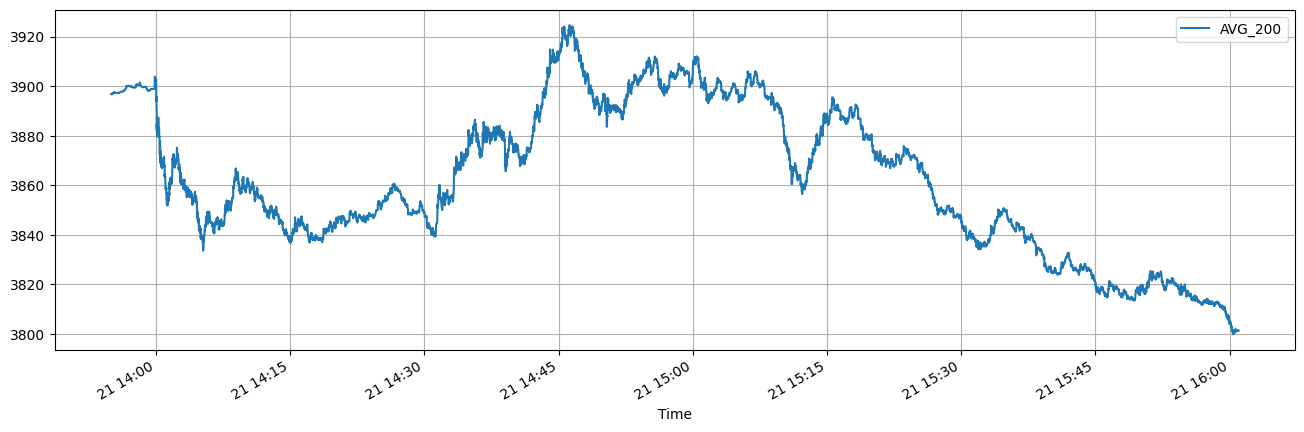

In [309]:
es1["2022-09-21 13:55":"2022-09-21 16:00"].plot( y='AVG_200', x='Time', figsize=(16,5)) # plot in volatile hour of AVG_200
plt.grid()

In [682]:
es1.to_csv('ES_Aug21_drv.csv')

In [276]:
es1.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Time', 'Hour', 'Minute',
       'Second', 'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm'],
      dtype='object')

Possible lead: Spikes at Times after which 5-10 min later, great Volatility follows upward or downward. Of course, its commun greater Volatility to be correlated with greater Volume, since that Volume fluctuation creates the Volatility. But can the Volume Spikes ahead (2-10 min) relate to or predict a possible Change? Can it be translated as: 'parking' the funds in a range or Accumulation for a possible distribution later? 

<AxesSubplot: xlabel='DateTime'>

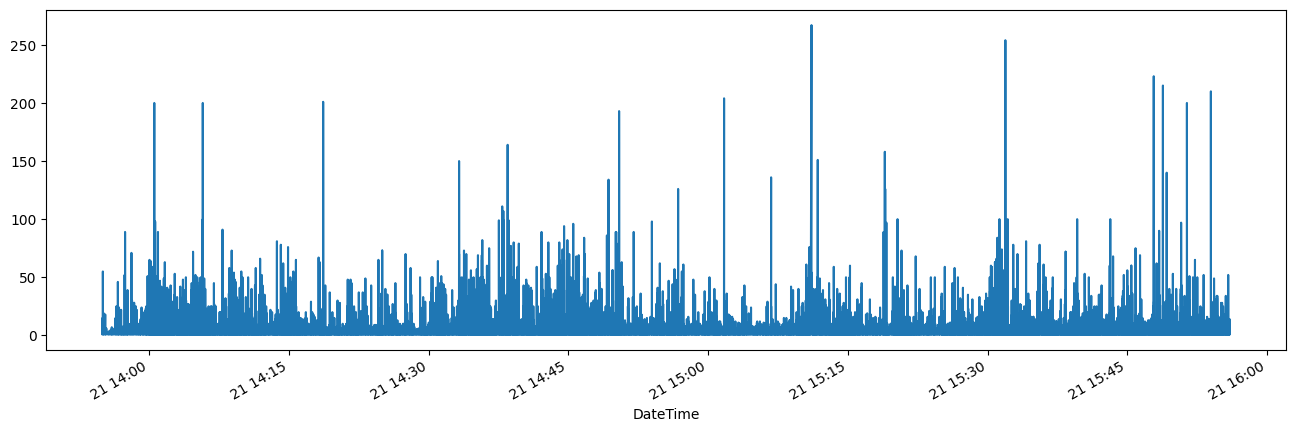

In [106]:
es1["2022-09-21 13:55":"2022-09-21 15:55"]['Vol'].plot( y='Ask', figsize=(16,5))

What is the story with Vol in the preceeding times? Can a period of preparation be deduced to exist with specific changes happenning ahead of a move?

<AxesSubplot: xlabel='DateTime'>

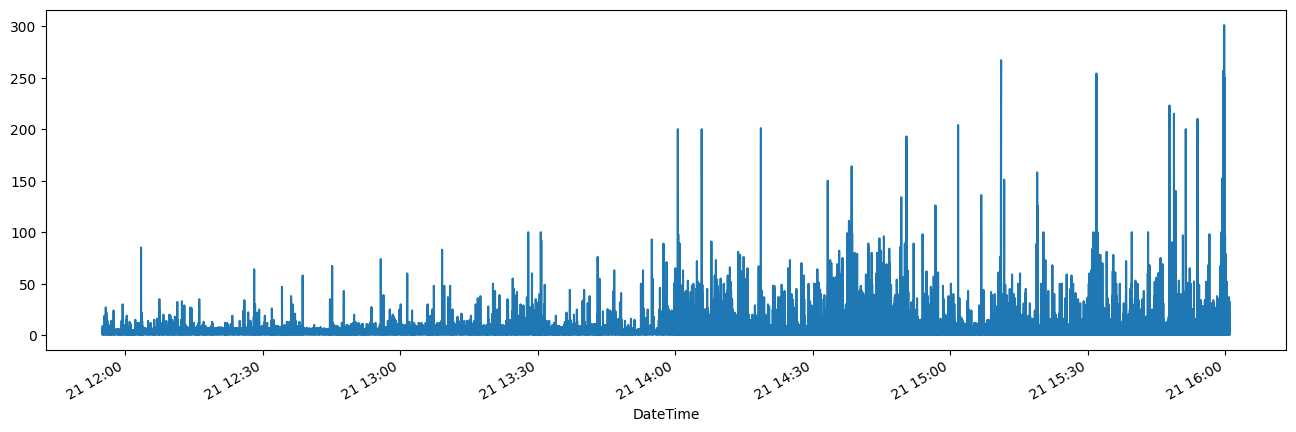

In [310]:
es1["2022-09-21 11:55":"2022-09-21 16:00"]['Vol'].plot( y='Ask', figsize=(16,5))

In [ ]:
# various possible derivatives mostly problematic TBR for future ref
# df['Gain'] = df['Close*'] - df['Open']  #  new column w vals from ...
# df['Rolling Close Average'] = df['Close'].rolling(2).mean()  #   MA of last 2 Close rows
# df['Open Standard Deviation'] = df['Open'].std()
# df['Rolling Open Standard Deviation'] = df['Open'].rolling(2).std()
# df['Rolling Volume Sum'] = df['Volume'].rolling(3).sum()   #  rolling sum for the “Volume”
# data3['Vol3'] =  data3['Volume'].rolling(3).mean() / 100
# gs.resample("5H").mean().head(15)
# gs.resample("W").agg(['mean', 'sum']).head()
# gs.resample("6D").mean().head()
es1['5_val'] = es.rolling('5T').Vol.sum() # (1814632,) 

### PCA

In [819]:
#Code task 1#

# Create a new dataframe, `es__scale` from `es1` 
es__scale = es1.copy()

# Save the labels (using the index attribute of `es1`) into the variable 'es_index'
es_index = es1.index
# # Save the column names (using the `columns` attribute) of `es1` into the variable 'es_columns'
es_columns = es1.columns
es__scale.tail()

Vol  BidAsk      Bid     Ask    Price  \
DateTime                                                         
2022-09-21 23:59:55.028    2      -1  3782.75  3783.0  3782.75   
2022-09-21 23:59:55.032    1       1  3782.75  3783.0  3783.00   
2022-09-21 23:59:55.032    1       1  3782.75  3783.0  3783.00   
2022-09-21 23:59:55.032    1       1  3782.75  3783.0  3783.00   
2022-09-21 23:59:57.008    1       1  3782.75  3783.0  3783.00   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 23:59:55.028 2022-09-21 23:59:55.028    23      59      55    28   
2022-09-21 23:59:55.032 2022-09-21 23:59:55.032    23      59      55    32   
2022-09-21 23:59:55.032 2022-09-21 23:59:55.032    23      59      55    32   
2022-09-21 23:59:55.032 2022-09-21 23:59:55.032    23      59      55    32   
2022-09-21 23:59:57.008 2022-09-21 23:59:57.008    23      59      57     8   

                         Vol_avg100  B_A_CumSum  STD_200     AVG_200  \
DateTime                                                               
2022-09-21 23:59:55.028        1.18      -56731  0.30329  3782.44875   
2022-09-21 23:59:55.032        1.18      -56730  0.30329  3782.44875   
2022-09-21 23:59:55.032        1.18      -56729  0.30329  3782.44875   
2022-09-21 23:59:55.032        1.17      -56728  0.30329  3782.44875   
2022-09-21 23:59:57.008        1.17      -56727  0.30329  3782.44875   

                         Price_R_BA_V  BA_Price_V  Price_Target  \
DateTime                                                          
2022-09-21 23:59:55.028    936.546988   -1891.375        3786.0   
2022-09-21 23:59:55.032    940.447445    3783.000        3786.0   
2022-09-21 23:59:55.032    940.447445    3783.000        3786.0   
2022-09-21 23:59:55.032    940.447445    3783.000        3786.0   
2022-09-21 23:59:57.008    940.447445    3783.000        3786.0   

                         Price_Target5  AVG_200_Vol  Vol_Cum_sum100  \
DateTime                                                              
2022-09-21 23:59:55.028         3797.0        1.225         2411487   
2022-09-21 23:59:55.032         3797.0        1.220         2411488   
2022-09-21 23:59:55.032         3797.0        1.220         2411489   
2022-09-21 23:59:55.032         3797.0        1.220         2411490   
2022-09-21 23:59:57.008         3797.0        1.220         2411491   

                         Scld_Price  Scaled_B_A_CmSm    STD20K       MA30K  \
DateTime                                                                     
2022-09-21 23:59:55.028    -2.53782        -1.761273  3.286744  3777.83975   
2022-09-21 23:59:55.032    -2.53782        -1.761213  3.286587  3777.84025   
2022-09-21 23:59:55.032    -2.53782        -1.761153  3.286412  3777.84075   
2022-09-21 23:59:55.032    -2.53782        -1.761093  3.286236  3777.84125   
2022-09-21 23:59:57.008    -2.53782        -1.761033  3.286060  3777.84175   

                              MA50K        MA70K       MA100K       MA200K  \
DateTime                                                                     
2022-09-21 23:59:55.028  3778.20798  3780.683482  3786.347060  3798.654050   
2022-09-21 23:59:55.032  3778.20795  3780.683282  3786.346823  3798.653853   
2022-09-21 23:59:55.032  3778.20792  3780.683082  3786.346585  3798.653654   
2022-09-21 23:59:55.032  3778.20789  3780.682882  3786.346347  3798.653456   
2022-09-21 23:59:57.008  3778.20786  3780.682682  3786.346110  3798.653259   

                              MA300K  Var_Vol_100K  Var_MinMax_MA20K  \
DateTime                                                               
2022-09-21 23:59:55.028  3807.320619      0.029369         10.762048   
2022-09-21 23:59:55.032  3807.320417      0.029368         10.761023   
2022-09-21 23:59:55.032  3807.320215      0.029367         10.759873   
2022-09-21 23:59:55.032  3807.320013      0.029366         10.758723   
2022-09-2

In [820]:
del es__scale['Time']  # delete Time since scaling can not apply to it

In [821]:
es_columns = es_columns.drop('Time')
es_columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Hour', 'Minute', 'Second',
       'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm',
       'STD20K', 'MA30K', 'MA50K', 'MA70K', 'MA100K', 'MA200K', 'MA300K',
       'Var_Vol_100K', 'Var_MinMax_MA20K', 'Var_ver', 'BA_Vol_Avg40K',
       'BA_BA_Avg40K', '5_val'],
      dtype='object')

In [792]:
import os
# from library.sb_utils import save_file
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [822]:
es__scale.head()

Vol  BidAsk      Bid      Ask    Price  Hour  Minute  \
DateTime                                                                        
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50     0       0   
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   

                         Second  Msec  Vol_avg100  B_A_CumSum  STD_200  \
DateTime                                                                 
2022-09-21 00:00:00.720       0   720         NaN          -1      NaN   
2022-09-21 00:00:00.720       0   720         NaN          -2      NaN   
2022-09-21 00:00:00.900       0   900         NaN          -1      NaN   
2022-09-21 00:00:00.900       0   900         NaN           0      NaN   
2022-09-21 00:00:00.900       0   900         NaN           1      NaN   

                         AVG_200  Price_R_BA_V  BA_Price_V  Price_Target  \
DateTime                                                                   
2022-09-21 00:00:00.720      NaN           NaN    -3879.50           NaN   
2022-09-21 00:00:00.720      NaN           NaN    -3879.50           NaN   
2022-09-21 00:00:00.900      NaN           NaN     3879.75           NaN   
2022-09-21 00:00:00.900      NaN           NaN     3879.75           NaN   
2022-09-21 00:00:00.900      NaN           NaN     3879.75           NaN   

                         Price_Target5  AVG_200_Vol  Vol_Cum_sum100  \
DateTime                                                              
2022-09-21 00:00:00.720            NaN          NaN               1   
2022-09-21 00:00:00.720            NaN          NaN               2   
2022-09-21 00:00:00.900            NaN          NaN               3   
2022-09-21 00:00:00.900            NaN          NaN               4   
2022-09-21 00:00:00.900            NaN          NaN               5   

                         Scld_Price  Scaled_B_A_CmSm  STD20K  MA30K  MA50K  \
DateTime                                                                     
2022-09-21 00:00:00.720    0.353388         1.643948     NaN    NaN    NaN   
2022-09-21 00:00:00.720    0.353388         1.643888     NaN    NaN    NaN   
2022-09-21 00:00:00.900    0.353388         1.643948     NaN    NaN    NaN   
2022-09-21 00:00:00.900    0.353388         1.644008     NaN    NaN    NaN   
2022-09-21 00:00:00.900    0.353388         1.644068     NaN    NaN    NaN   

                         MA70K  MA100K  MA200K  MA300K  Var_Vol_100K  \
DateTime                                                               
2022-09-21 00:00:00.720    NaN     NaN     NaN     NaN           NaN   
2022-09-21 00:00:00.720    NaN     NaN     NaN     NaN           NaN   
2022-09-21 00:00:00.900    NaN     NaN     NaN     NaN           NaN   
2022-09-21 00:00:00.900    NaN     NaN     NaN     NaN           NaN   
2022-09-21 00:00:00.900    NaN     NaN     NaN     NaN           NaN   

                         Var_MinMax_MA20K  Var_ver  BA_Vol_Avg40K  \
DateTime                                                            
2022-09-21 00:00:00.720               NaN      NaN            NaN   
2022-09-21 00:00:00.720               NaN      NaN            NaN   
2022-09-21 00:00:00.900               NaN      NaN            NaN   
2022-09-21 00:00:00.900               NaN      NaN            NaN   
2022-09-21 00:00:00.900               NaN      NaN            NaN   

                         BA_BA_Avg40K  5_val  
DateTime                                      
2022-09-21 00:00:00.720           NaN    1.0  
2022-09-21 00:00:00.720           NaN    2.0  
2022-09-21 00:00:00.900           NaN    3.0  
2022-09-21 00:00:00.900           NaN    4.0  
2022-09-21 00:00:00.900           NaN    5.0

In [823]:
es__scale = es__scale.fillna(0)

In [824]:
es__scale.head()

Vol  BidAsk      Bid      Ask    Price  Hour  Minute  \
DateTime                                                                        
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50     0       0   
2022-09-21 00:00:00.720    1      -1  3879.50  3879.75  3879.50     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   
2022-09-21 00:00:00.900    1       1  3879.25  3879.75  3879.75     0       0   

                         Second  Msec  Vol_avg100  B_A_CumSum  STD_200  \
DateTime                                                                 
2022-09-21 00:00:00.720       0   720         0.0          -1      0.0   
2022-09-21 00:00:00.720       0   720         0.0          -2      0.0   
2022-09-21 00:00:00.900       0   900         0.0          -1      0.0   
2022-09-21 00:00:00.900       0   900         0.0           0      0.0   
2022-09-21 00:00:00.900       0   900         0.0           1      0.0   

                         AVG_200  Price_R_BA_V  BA_Price_V  Price_Target  \
DateTime                                                                   
2022-09-21 00:00:00.720      0.0           0.0    -3879.50           0.0   
2022-09-21 00:00:00.720      0.0           0.0    -3879.50           0.0   
2022-09-21 00:00:00.900      0.0           0.0     3879.75           0.0   
2022-09-21 00:00:00.900      0.0           0.0     3879.75           0.0   
2022-09-21 00:00:00.900      0.0           0.0     3879.75           0.0   

                         Price_Target5  AVG_200_Vol  Vol_Cum_sum100  \
DateTime                                                              
2022-09-21 00:00:00.720            0.0          0.0               1   
2022-09-21 00:00:00.720            0.0          0.0               2   
2022-09-21 00:00:00.900            0.0          0.0               3   
2022-09-21 00:00:00.900            0.0          0.0               4   
2022-09-21 00:00:00.900            0.0          0.0               5   

                         Scld_Price  Scaled_B_A_CmSm  STD20K  MA30K  MA50K  \
DateTime                                                                     
2022-09-21 00:00:00.720    0.353388         1.643948     0.0    0.0    0.0   
2022-09-21 00:00:00.720    0.353388         1.643888     0.0    0.0    0.0   
2022-09-21 00:00:00.900    0.353388         1.643948     0.0    0.0    0.0   
2022-09-21 00:00:00.900    0.353388         1.644008     0.0    0.0    0.0   
2022-09-21 00:00:00.900    0.353388         1.644068     0.0    0.0    0.0   

                         MA70K  MA100K  MA200K  MA300K  Var_Vol_100K  \
DateTime                                                               
2022-09-21 00:00:00.720    0.0     0.0     0.0     0.0           0.0   
2022-09-21 00:00:00.720    0.0     0.0     0.0     0.0           0.0   
2022-09-21 00:00:00.900    0.0     0.0     0.0     0.0           0.0   
2022-09-21 00:00:00.900    0.0     0.0     0.0     0.0           0.0   
2022-09-21 00:00:00.900    0.0     0.0     0.0     0.0           0.0   

                         Var_MinMax_MA20K  Var_ver  BA_Vol_Avg40K  \
DateTime                                                            
2022-09-21 00:00:00.720               0.0      0.0            0.0   
2022-09-21 00:00:00.720               0.0      0.0            0.0   
2022-09-21 00:00:00.900               0.0      0.0            0.0   
2022-09-21 00:00:00.900               0.0      0.0            0.0   
2022-09-21 00:00:00.900               0.0      0.0            0.0   

                         BA_BA_Avg40K  5_val  
DateTime                                      
2022-09-21 00:00:00.720           0.0    1.0  
2022-09-21 00:00:00.720           0.0    2.0  
2022-09-21 00:00:00.900           0.0    3.0  
2022-09-21 00:00:00.900           0.0    4.0  
2022-09-21 00:00:00.900           0.0    5.0

In [825]:
es__scale.dtypes

Vol                   int64
BidAsk                int64
Bid                 float64
Ask                 float64
Price               float64
Hour                  int64
Minute                int64
Second                int64
Msec                  int32
Vol_avg100          float64
B_A_CumSum            int64
STD_200             float64
AVG_200             float64
Price_R_BA_V        float64
BA_Price_V          float64
Price_Target        float64
Price_Target5       float64
AVG_200_Vol         float64
Vol_Cum_sum100        int64
Scld_Price          float64
Scaled_B_A_CmSm     float64
STD20K              float64
MA30K               float64
MA50K               float64
MA70K               float64
MA100K              float64
MA200K              float64
MA300K              float64
Var_Vol_100K        float64
Var_MinMax_MA20K    float64
Var_ver             float64
BA_Vol_Avg40K       float64
BA_BA_Avg40K        float64
5_val               float64
dtype: object

In [826]:
es__scale = scale(es__scale)

In [827]:
es__scale

array([[-0.16945504, -0.85892345,  0.35524597, ...,  0.53524956,
        -0.69429293, -1.35448073],
       [-0.16945504, -0.85892345,  0.35524597, ...,  0.53524956,
        -0.69429293, -1.35444415],
       [-0.16945504,  0.91435779,  0.34777489, ...,  0.53524956,
        -0.69429293, -1.35440756],
       ...,
       [-0.16945504,  0.91435779, -2.53606385, ...,  0.84956809,
        -0.62565676, -1.32989643],
       [-0.16945504,  0.91435779, -2.53606385, ...,  0.85030665,
        -0.62533081, -1.32985985],
       [-0.16945504,  0.91435779, -2.53606385, ...,  0.85104518,
        -0.6250041 , -1.32985985]])

In [828]:
es_scaled_df = pd.DataFrame(es__scale, columns= es_columns)
es_scaled_df.head()

Vol    BidAsk       Bid       Ask     Price      Hour    Minute  \
0 -0.169455 -0.858923  0.355246  0.353388  0.350767 -3.523979 -1.592352   
1 -0.169455 -0.858923  0.355246  0.353388  0.350767 -3.523979 -1.592352   
2 -0.169455  0.914358  0.347775  0.353388  0.358238 -3.523979 -1.592352   
3 -0.169455  0.914358  0.347775  0.353388  0.358238 -3.523979 -1.592352   
4 -0.169455  0.914358  0.347775  0.353388  0.358238 -3.523979 -1.592352   

     Second      Msec  Vol_avg100  B_A_CumSum  STD_200    AVG_200  \
0 -1.621886  0.819502   -3.278087    1.643948 -1.97789 -73.618749   
1 -1.621886  0.819502   -3.278087    1.643888 -1.97789 -73.618749   
2 -1.621886  1.441165   -3.278087    1.643948 -1.97789 -73.618749   
3 -1.621886  1.441165   -3.278087    1.644008 -1.97789 -73.618749   
4 -1.621886  1.441165   -3.278087    1.644068 -1.97789 -73.618749   

   Price_R_BA_V  BA_Price_V  Price_Target  Price_Target5  AVG_200_Vol  \
0     -1.821001   -0.907585     -15.38696       -4.65361    -3.669224   
1     -1.821001   -0.907585     -15.38696       -4.65361    -3.669224   
2     -1.821001    0.964558     -15.38696       -4.65361    -3.669224   
3     -1.821001    0.964558     -15.38696       -4.65361    -3.669224   
4     -1.821001    0.964558     -15.38696       -4.65361    -3.669224   

   Vol_Cum_sum100  Scld_Price  Scaled_B_A_CmSm    STD20K     MA30K     MA50K  \
0       -1.762869    0.353388         1.643948 -1.806759 -7.696607 -5.933648   
1       -1.762867    0.353388         1.643888 -1.806759 -7.696607 -5.933648   
2       -1.762866    0.353388         1.643948 -1.806759 -7.696607 -5.933648   
3       -1.762864    0.353388         1.644008 -1.806759 -7.696607 -5.933648   
4       -1.762863    0.353388         1.644068 -1.806759 -7.696607 -5.933648   

      MA70K    MA100K    MA200K    MA300K  Var_Vol_100K  Var_MinMax_MA20K  \
0 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532         -0.838997   
1 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532         -0.838997   
2 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532         -0.838997   
3 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532         -0.838997   
4 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532         -0.838997   

    Var_ver  BA_Vol_Avg40K  BA_BA_Avg40K     5_val  
0 -1.053558        0.53525     -0.694293 -1.354481  
1 -1.053558        0.53525     -0.694293 -1.354444  
2 -1.053558        0.53525     -0.694293 -1.354408  
3 -1.053558        0.53525     -0.694293 -1.354371  
4 -1.053558        0.53525     -0.694293 -1.354334

In [829]:
es_scaled_df.mean()

Vol                -1.862198e-13
BidAsk             -1.901206e-14
Bid                 1.283564e-13
Ask                -8.025251e-14
Price              -1.998209e-13
Hour                3.444410e-12
Minute             -2.639411e-13
Second             -1.943249e-15
Msec                3.193989e-16
Vol_avg100         -7.354279e-14
B_A_CumSum         -1.188923e-14
STD_200            -1.905401e-14
AVG_200            -4.824685e-14
Price_R_BA_V       -4.636420e-15
BA_Price_V          8.956876e-16
Price_Target       -4.038986e-15
Price_Target5       3.198823e-13
AVG_200_Vol         6.863133e-14
Vol_Cum_sum100      1.676266e-15
Scld_Price         -8.031667e-14
Scaled_B_A_CmSm    -1.169735e-14
STD20K             -1.068297e-14
MA30K              -1.398088e-14
MA50K              -9.694196e-14
MA70K               1.548945e-13
MA100K              4.193610e-13
MA200K              1.070907e-12
MA300K              1.843235e-12
Var_Vol_100K        6.069039e-14
Var_MinMax_MA20K    1.825623e-15
Var_ver   

In [833]:
es_scaled_df.sample(6)

Vol    BidAsk       Bid       Ask     Price      Hour    Minute  \
623881   0.345740 -0.858923  0.639147  0.637279  0.634660  0.071648 -0.418602   
1031630 -0.169455  0.914358  0.310419  0.308563  0.313413  0.348235  0.475683   
131001  -0.169455  0.914358  0.564436  0.562571  0.567422 -1.587872  1.314076   
66547   -0.169455 -0.858923  0.153527  0.151676  0.149054 -2.694219  0.084433   
1408505 -0.169455  0.914358  0.063874  0.062026  0.066874  0.624822 -0.474495   
507284  -0.169455  0.914358  0.706387  0.704517  0.709369 -0.481525  0.196219   

           Second      Msec  Vol_avg100  B_A_CumSum   STD_200   AVG_200  \
623881  -0.253357  0.114949    0.964901    0.613558 -0.348931  0.405332   
1031630 -0.481445 -0.410011   -0.811234   -0.333037  1.707384  0.193890   
131001   0.316864  0.239282   -0.367200    1.398205 -0.633990  0.362073   
66547   -0.766555  1.344462   -0.589217    1.377857 -0.324900  0.103302   
1408505  1.001129 -0.271864   -0.194520   -0.815819 -0.490699  0.045076   
507284   1.457305  0.253097    0.964901    0.702395 -1.180409  0.457538   

         Price_R_BA_V  BA_Price_V  Price_Target  Price_Target5  AVG_200_Vol  \
623881      -0.644359   -0.440711      0.152293       0.237957     0.735087   
1031630      2.413112    0.964196      0.113347       0.178231    -0.907901   
131001      -0.492737    0.966247      0.108354       0.205264    -0.452282   
66547       -0.104736   -0.905957      0.031462      -4.653610    -0.617962   
1408505     -0.519444    0.962206      0.094374       0.207779    -0.051890   
507284      -1.246390    0.967393      0.146301       0.236071     0.748894   

         Vol_Cum_sum100  Scld_Price  Scaled_B_A_CmSm    STD20K     MA30K  \
623881        -0.487945    0.637279         0.613558 -0.930590  0.175705   
1031630        0.255428    0.308563        -0.333037  0.315952  0.151966   
131001        -1.526158    0.562571         1.398205 -0.161362  0.155300   
66547         -1.644469    0.151676         1.377857  0.994316  0.120271   
1408505        0.908758    0.062026        -0.815819  1.509604  0.156289   
507284        -0.750939    0.704517         0.702395 -1.126833  0.173584   

            MA50K     MA70K    MA100K    MA200K    MA300K  Var_Vol_100K  \
623881   0.207080  0.233328  0.267958  0.368476  0.459113     -0.863993   
1031630  0.181799  0.205108  0.236570  0.338656  0.431619      1.435521   
131001   0.185071  0.210801  0.245045 -2.840744 -2.246724     -0.169750   
66547    0.165682 -4.988276 -4.138627 -2.840744 -2.246724     -0.960532   
1408505  0.192702  0.215992  0.249750  0.365851  0.459120      0.332857   
507284   0.200801  0.227941  0.264712  0.370057  0.459171     -0.915751   

         Var_MinMax_MA20K   Var_ver  BA_Vol_Avg40K  BA_BA_Avg40K     5_val  
623881          -0.687402 -0.538714      -0.767161      0.121501 -0.991606  
1031630          0.048506  0.371033      -1.088270      0.791909  1.598818  
131001          -0.305610 -0.684373       0.897626     -0.617613 -1.252961  
66547            0.704472 -0.753475      -0.248643     -0.304420 -1.230681  
1408505          1.323094  0.226240      -0.287019     -0.217974  0.117943  
507284          -0.747705 -0.654299       0.103567     -0.598467 -0.957766

In [830]:
es_scaled_df.std()

Vol                 1.0
BidAsk              1.0
Bid                 1.0
Ask                 1.0
Price               1.0
Hour                1.0
Minute              1.0
Second              1.0
Msec                1.0
Vol_avg100          1.0
B_A_CumSum          1.0
STD_200             1.0
AVG_200             1.0
Price_R_BA_V        1.0
BA_Price_V          1.0
Price_Target        1.0
Price_Target5       1.0
AVG_200_Vol         1.0
Vol_Cum_sum100      1.0
Scld_Price          1.0
Scaled_B_A_CmSm     1.0
STD20K              1.0
MA30K               1.0
MA50K               1.0
MA70K               1.0
MA100K              1.0
MA200K              1.0
MA300K              1.0
Var_Vol_100K        1.0
Var_MinMax_MA20K    1.0
Var_ver             1.0
BA_Vol_Avg40K       1.0
BA_BA_Avg40K        1.0
5_val               1.0
dtype: float64

In [835]:
es_pca = PCA().fit(es_scaled_df)

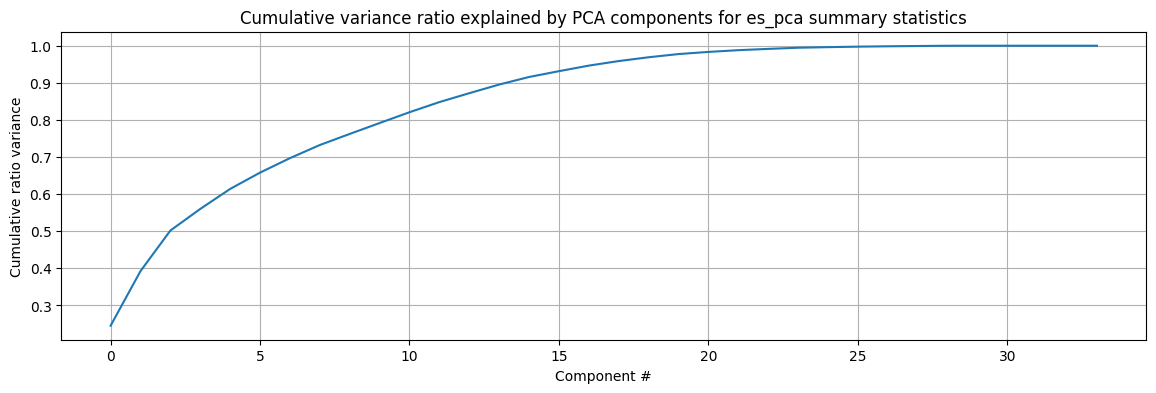

In [838]:
plt.subplots(figsize=(14, 4))
plt.plot(es_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for es_pca summary statistics')
plt.grid()

The first 10 account for 83% of the components  ; 15 for 94% ; 20 components for 98% of the total 

In [839]:
es_pca_x = es_pca.transform(es__scale)

c:\Users\tonya\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [841]:
es_pca_x

array([[-1.18676465e+00,  2.83060647e+01,  3.45369144e+00, ...,
         3.78121930e-04, -1.64694821e-15, -1.67089818e-14],
       [-1.18680949e+00,  2.83060734e+01,  3.45368416e+00, ...,
         3.78100838e-04, -1.60358233e-15, -1.66768401e-14],
       [-1.17873359e+00,  2.82827622e+01,  3.52591544e+00, ...,
         3.24607580e-03, -2.09103724e-15, -1.69310243e-14],
       ...,
       [-5.26779189e+00,  3.23714153e+00,  1.31410933e+00, ...,
        -1.40371541e-03, -1.37096999e-15,  8.13424642e-15],
       [-5.26719575e+00,  3.23650522e+00,  1.30692754e+00, ...,
        -1.40273761e-03, -1.36347832e-15,  8.24708045e-15],
       [-5.26791992e+00,  3.23657983e+00,  1.30858168e+00, ...,
        -1.40701667e-03, -1.73981117e-15,  8.21493052e-15]])

In [ ]:
x = es_pca_x[:, 0]
y = es_pca_x[:, 1]
es = es_index
pc_var = 100 * es_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'ES summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(es, x, y):
    plt.annotate(s, (x, y))

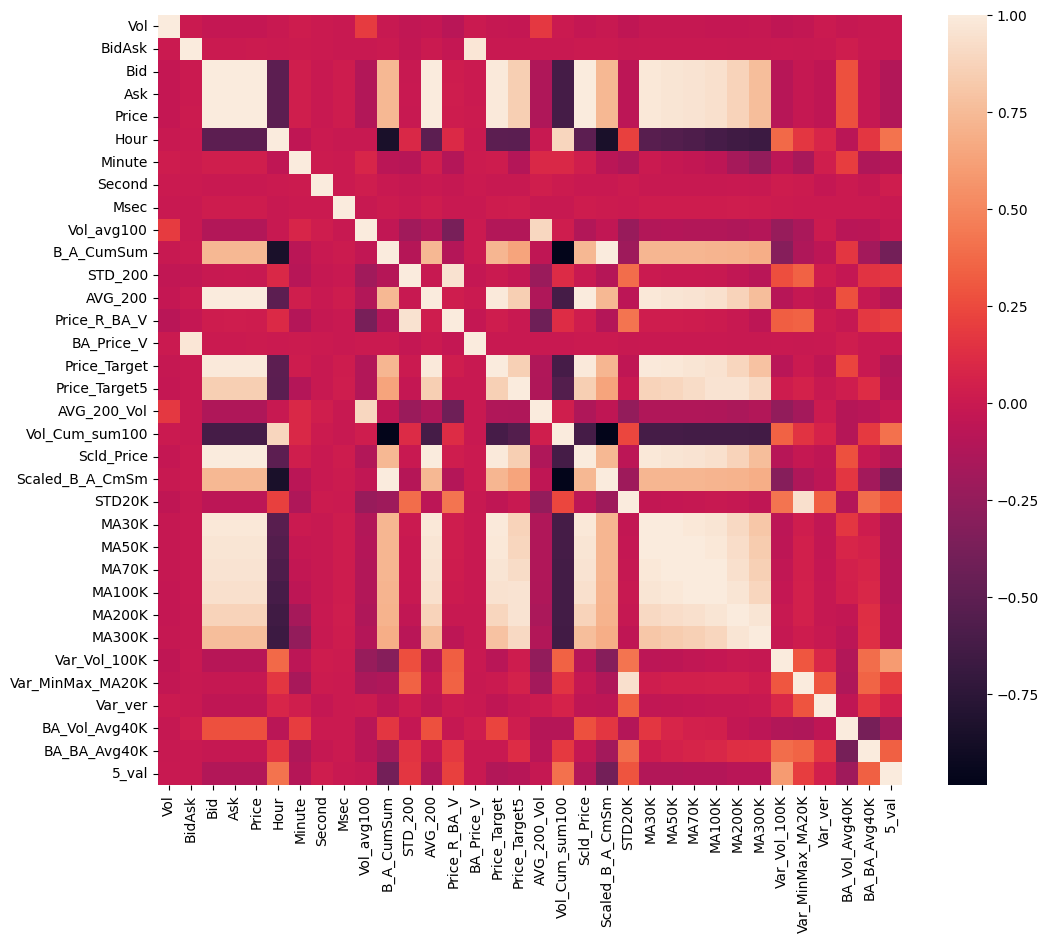

In [844]:
plt.subplots(figsize=(12,10))
sns.heatmap(es1.corr());

Text(0.5, 1.0, 'Correlations in ES data')

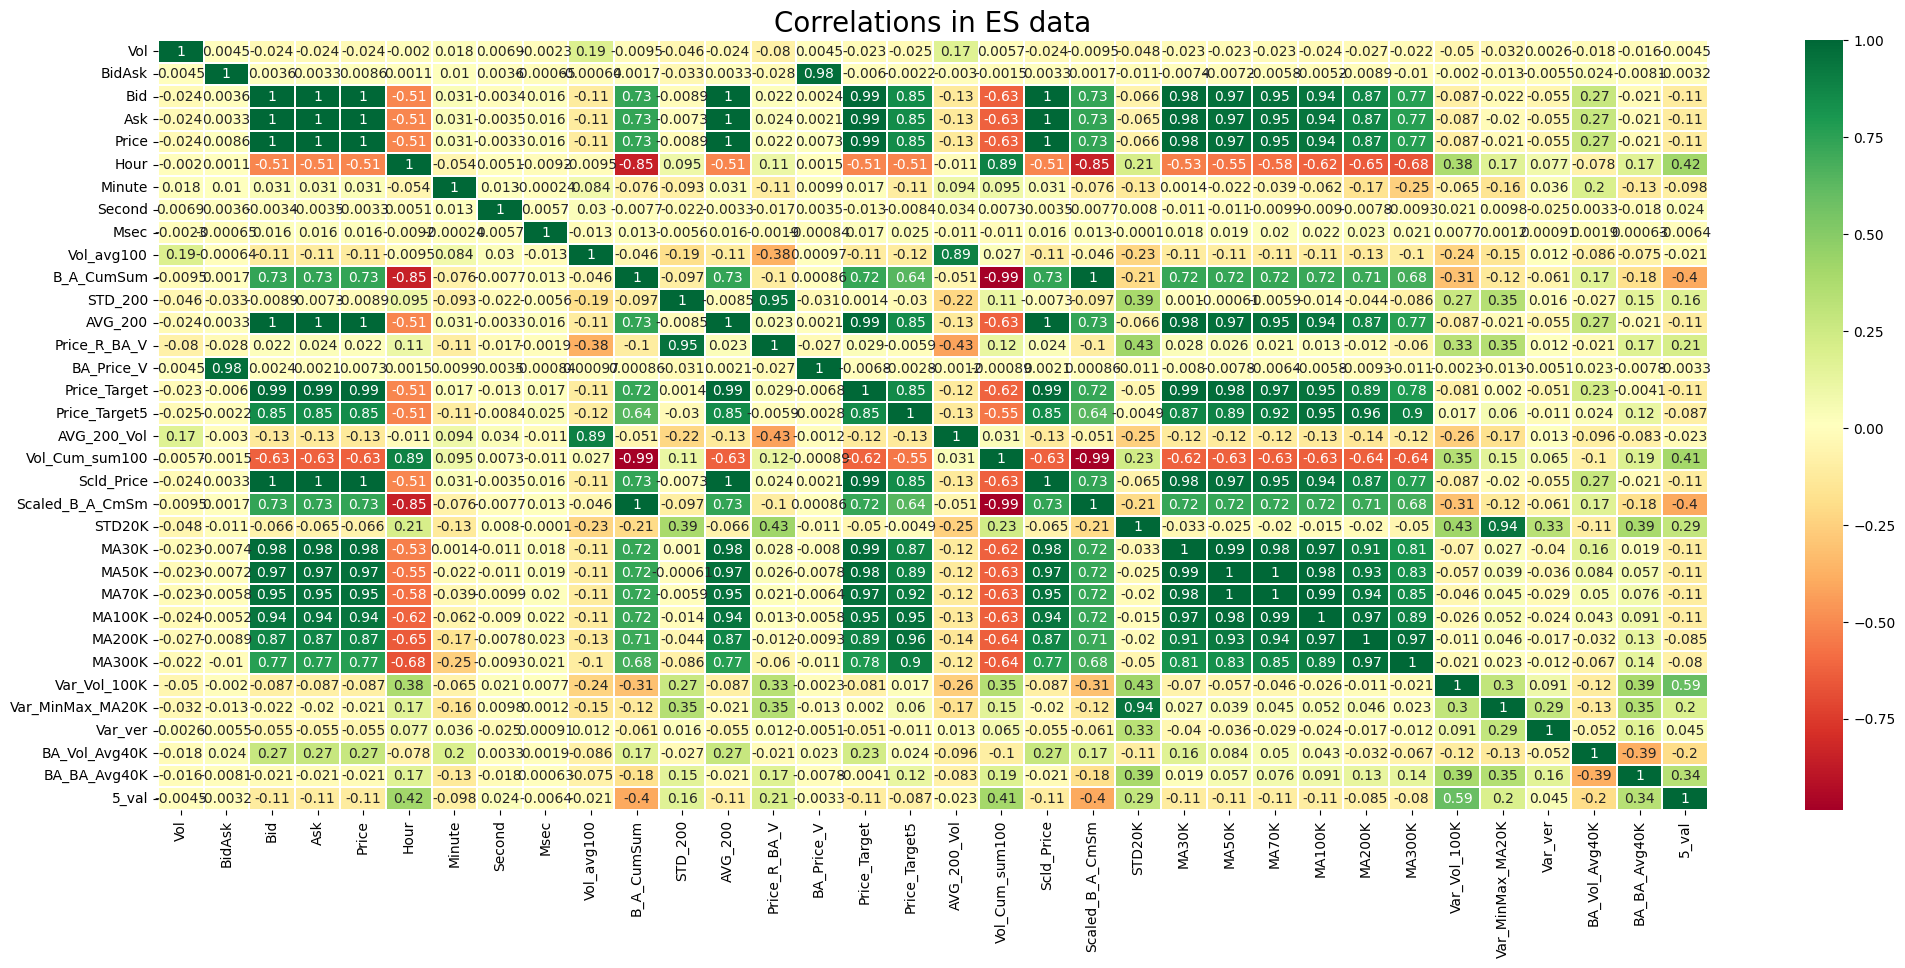

In [845]:
# seaborn heatmap of correlations in es data
plt.subplots(figsize=(25,10))
# Using numpy ‘.tril()’ method to take the upper correlation matrix and mask attribute: to create an upper triangle matrix.
#matrix = np.tril(es1.corr())
#sns.heatmap(ski_data.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(es1.corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations in ES data', fontsize=20)

In [850]:
es1.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Time', 'Hour', 'Minute',
       'Second', 'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm',
       'STD20K', 'MA30K', 'MA50K', 'MA70K', 'MA100K', 'MA200K', 'MA300K',
       'Var_Vol_100K', 'Var_MinMax_MA20K', 'Var_ver', 'BA_Vol_Avg40K',
       'BA_BA_Avg40K', '5_val'],
      dtype='object')

Text(0.5, 1.0, 'Correlations between Price vs. features ')

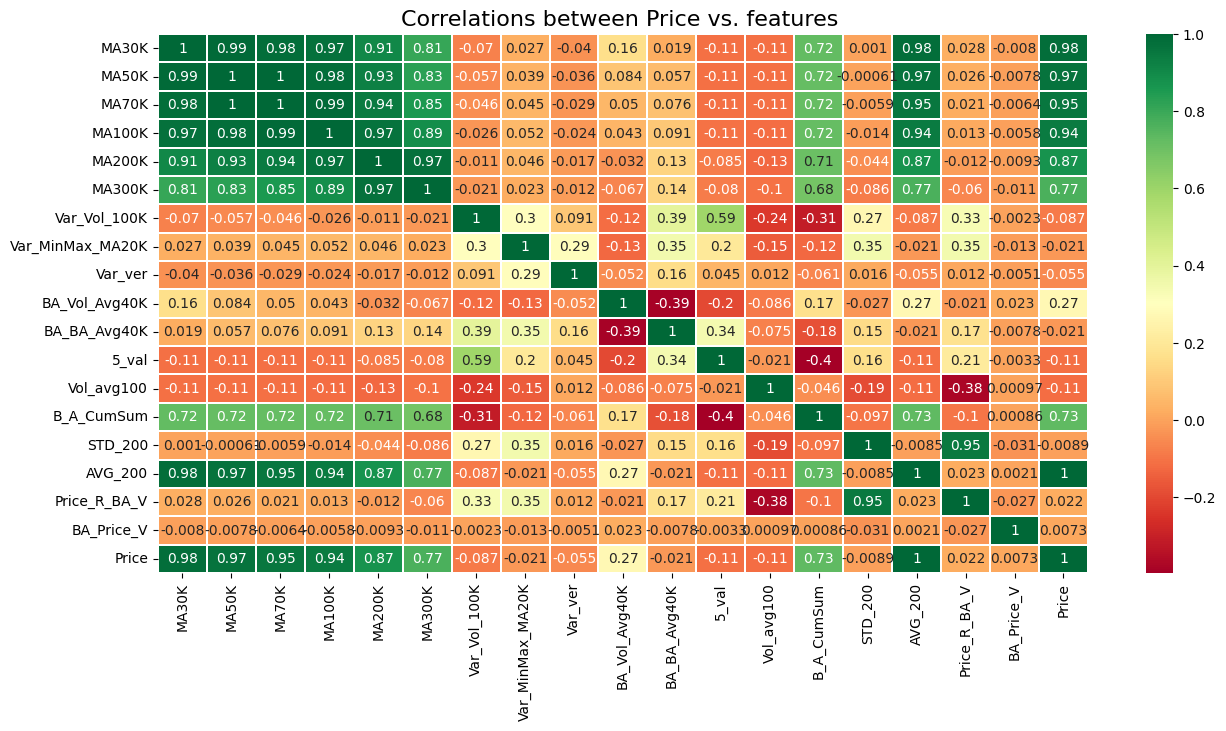

In [848]:
#Seaborn heatmap of correlations in es data

plt.subplots(figsize=(15,7))

#matrix = np.tril(es.corr())
#sns.heatmap(es.corr(), linewidths=.1, annot=True, cmap='coolwarm', center=0, mask=matrix);
sns.heatmap(es1[['MA30K', 'MA50K', 'MA70K', 'MA100K', 'MA200K', 'MA300K',
       'Var_Vol_100K', 'Var_MinMax_MA20K', 'Var_ver', 'BA_Vol_Avg40K',
       'BA_BA_Avg40K', '5_val','Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V','Price']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations between Price vs. features ', fontsize=16)

In [853]:
# function to create scatterplots of Price against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Price', data=es1, alpha=0.5)
        ax.set(xlabel=col, ylabel='Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [851]:

features = [x for x in es1.columns if x not in ['Time', 'Hour', 'Minute', 'Second', 'Msec']]

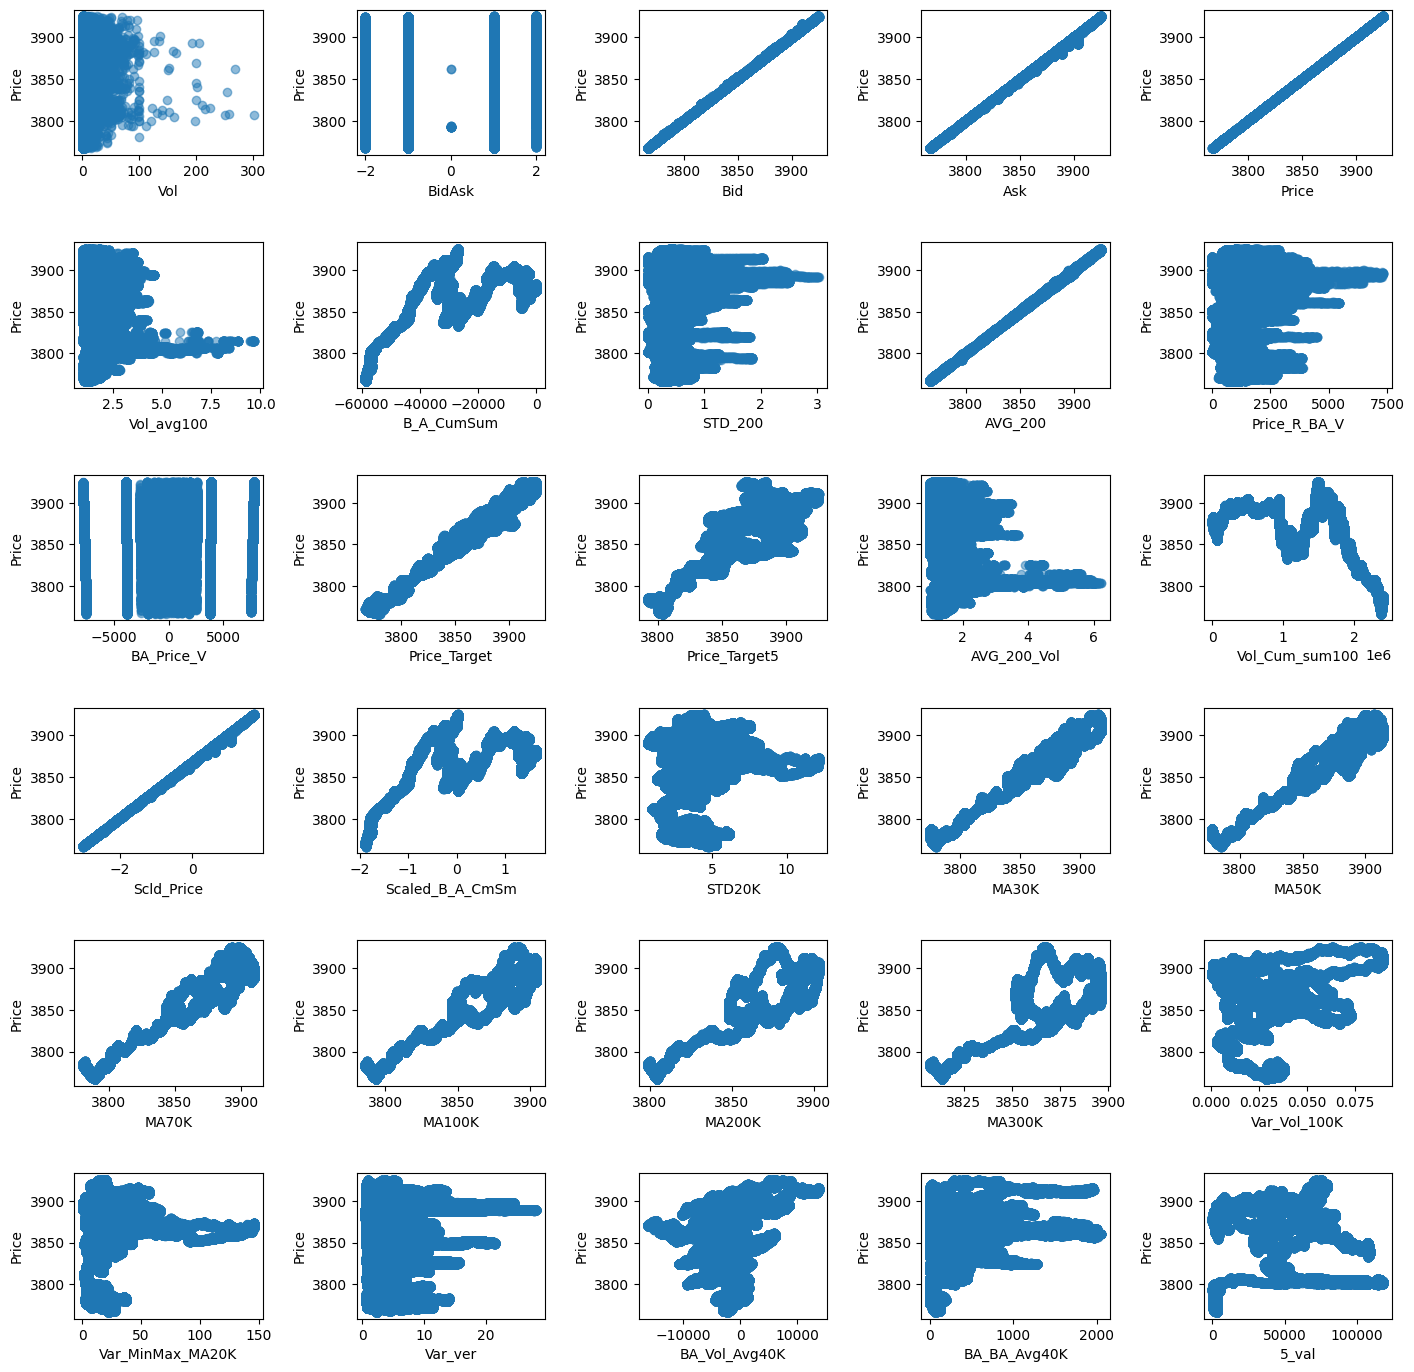

In [854]:
scatterplots(features, ncol=5, figsize=(17, 17))


In [858]:
es1.columns

Index(['Vol', 'BidAsk', 'Bid', 'Ask', 'Price', 'Time', 'Hour', 'Minute',
       'Second', 'Msec', 'Vol_avg100', 'B_A_CumSum', 'STD_200', 'AVG_200',
       'Price_R_BA_V', 'BA_Price_V', 'Price_Target', 'Price_Target5',
       'AVG_200_Vol', 'Vol_Cum_sum100', 'Scld_Price', 'Scaled_B_A_CmSm',
       'STD20K', 'MA30K', 'MA50K', 'MA70K', 'MA100K', 'MA200K', 'MA300K',
       'Var_Vol_100K', 'Var_MinMax_MA20K', 'Var_ver', 'BA_Vol_Avg40K',
       'BA_BA_Avg40K', '5_val', '1_ratio', '2_ratio', '3_ratio', '4_ratio',
       '5_ratio'],
      dtype='object')

In [865]:
es1['MA70K_ratio'] = es1.Price / es1.MA70K
es1['MA100K_ratio'] = es1.Price / es1.MA100K
es1['Var_MinMax_MA20K_ratio'] = es1.Price / es1.Var_MinMax_MA20K
es1['Vol_Cum_sum100_ratio'] = es1.Price / es1.Vol_Cum_sum100
es1['MA300K_ratio'] = es1.Price / es1.MA300K
es1['Var_Vol_100K_ratio'] = es1.Price / es1[ 'Var_Vol_100K']
# es1['7_ratio'] = es1.Price / es1.MA200K
# es1['8_ratio'] = es1.Price / es1.BA_Vol_Avg40K

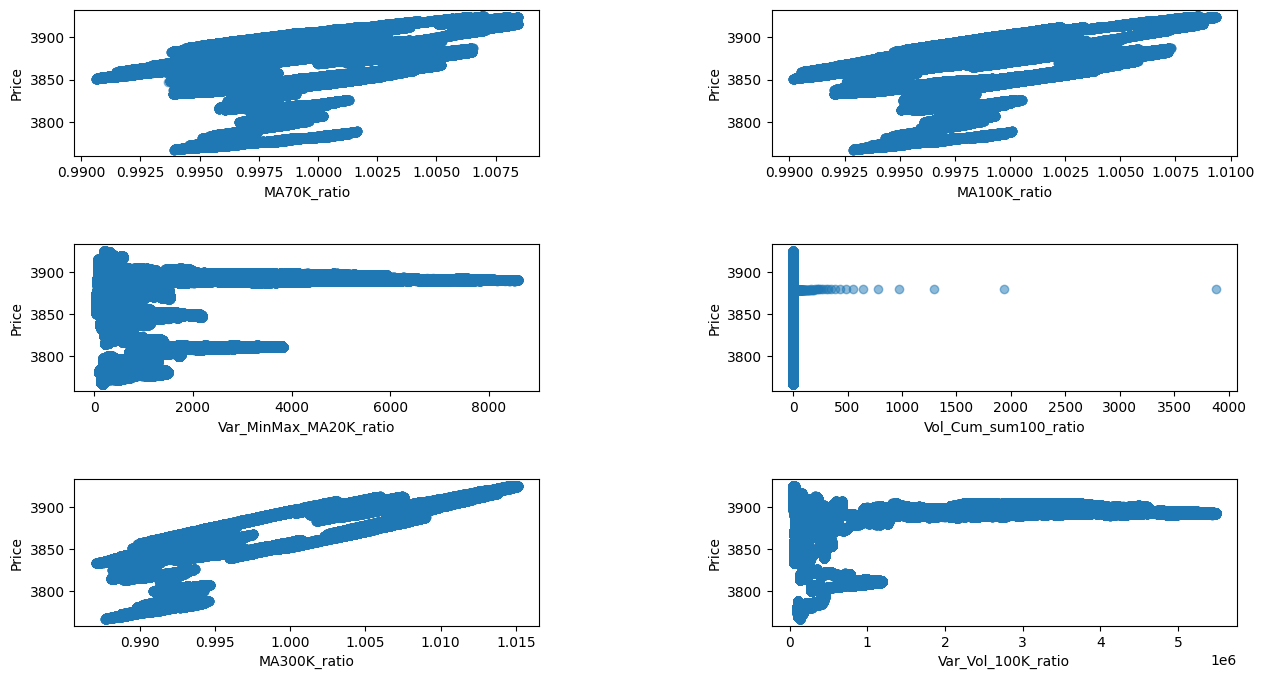

In [866]:
scatterplots(['MA70K_ratio', 'MA100K_ratio',  'Var_MinMax_MA20K_ratio', 'Vol_Cum_sum100_ratio', 'MA300K_ratio', 'Var_Vol_100K_ratio'], ncol=2)

#### issue with apply lambda 

does not work!   Why?

In [ ]:

target['Target3'] = es1['Price'].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Price']   #   bool if next tick Price was higher or lower


In [317]:
t = es1.loc['2022-09-21 13:00:00' : '2022-09-21 16:00:00'].copy()  # focus on time from 13-16 hr

In [414]:
t.shape  # (1085123, 22)  
t.sample()

Vol  BidAsk     Bid      Ask    Price  \
DateTime                                                         
2022-09-21 15:13:20.284    1       1  3869.0  3869.25  3869.25   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 15:13:20.284 2022-09-21 15:13:20.284    15      13      20   284   

                         ...   STD_200     AVG_200  Price_R_BA_V  BA_Price_V  \
DateTime                 ...                                                   
2022-09-21 15:13:20.284  ...  0.232338  3869.23125     809.88504     3869.25   

                         Price_Target  Price_Target5  AVG_200_Vol  \
DateTime                                                            
2022-09-21 15:13:20.284       3862.75         3901.5         1.11   

                         Vol_Cum_sum100  Scld_Price  Scaled_B_A_CmSm  
DateTime                                                              
2022-09-21 15:13:20.284         1747366    0.039613         -0.84229  

[1 rows x 22 columns]

create various lengths MA on smaller df

In [646]:
# tt = t['Price'].to_frame()
tt['STD'] = tt['Price'].rolling(20000).std()
tt['MA30K'] = tt['Price'].rolling(30000).mean() 
tt['MA40K'] = tt['Price'].rolling(40000).mean() 
tt['MA60K'] = tt['Price'].rolling(60000).mean() 
tt['MA100K'] = tt['Price'].rolling(100000).mean() 
tt['MA200K'] = tt['Price'].rolling(200000).mean() 
tt['MA300K'] = tt['Price'].rolling(300000).mean() 
tt.shape # (1085123, 3)

(1085123, 8)

change order of columns

In [647]:
# cols = tt.columns.tolist()
# cols =  cols[:3] + cols[-2:-1] + cols[-3:-2] + cols[-1:]
# print(cols)
# tt = tt[cols]
tt.sample(5)

Price       STD        MA30K       MA300K  \
DateTime                                                               
2022-09-21 14:53:42.324  3903.00  5.140320  3893.755617  3880.833426   
2022-09-21 14:12:34.408  3847.50  3.723697  3856.442975          NaN   
2022-09-21 15:04:48.916  3898.00  2.537862  3898.692183  3893.938605   
2022-09-21 15:01:31.488  3894.75  4.384813  3904.779642  3891.302570   
2022-09-21 15:10:37.052  3875.00  7.161781  3891.610083  3896.225060   

                              MA100K       MA200K        MA40K        MA60K  
DateTime                                                                     
2022-09-21 14:53:42.324  3904.062650  3892.775506  3893.557131  3896.031812  
2022-09-21 14:12:34.408  3850.583077  3862.099130  3857.977519  3855.341071  
2022-09-21 15:04:48.916  3900.971350  3902.546324  3900.813275  3901.325800  
2022-09-21 15:01:31.488  3899.822900  3900.235715  3903.390431  3904.388871  
2022-09-21 15:10:37.052  3898.092260  3900.603906  3893.222219  3894.581246

Chart w MA of 6 time intervals over Price

<AxesSubplot: xlabel='DateTime'>

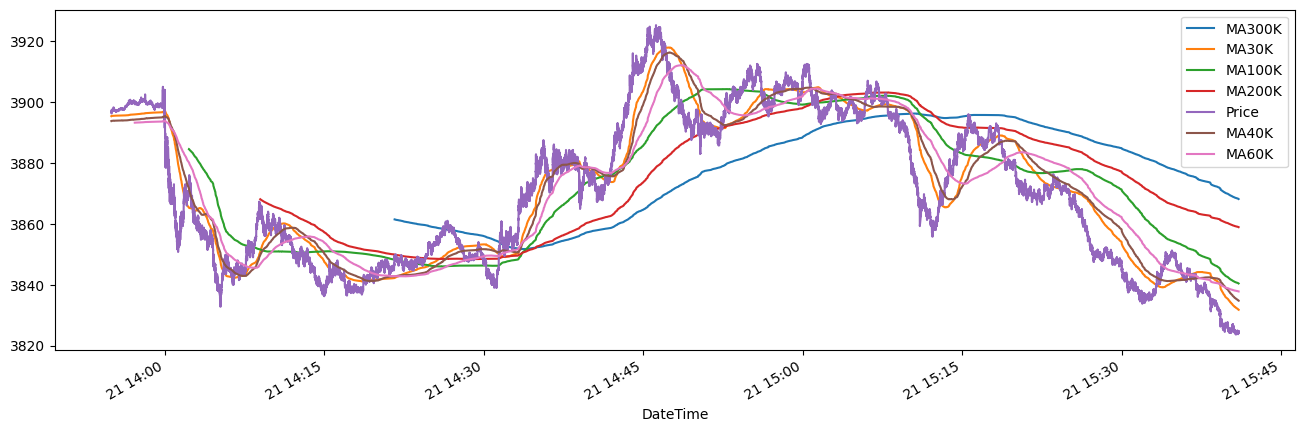

In [648]:
tt['2022-09-21 13:55':'2022-09-21 15:40'][['MA300K', 'MA30K' ,'MA100K', 'MA200K', 'Price','MA40K', 'MA60K']].plot( label='tt', figsize=(16,5))

In [ ]:
# test = pd.Series()
tt['Target2'] = tt.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Price'] # DOES NOT WORK !!

In [538]:
# tt['EWMA3000'] = tt['Price'].ewm(span=3000).mean()   # DOES NOT WORK
# del tt['EWMA30K']
# tt['MA60K'] = tt['Price'].rolling(60000).mean() 
# tt['MA30K'] = tt['Price'].rolling(30000).mean() 
tt['MA40K'] = tt['Price'].rolling(40000).mean() 

In [ ]:
tt['2022-09-21 13:55':'2022-09-21 15:40'][['EWMA40K', 'EWMA60K', 'Price']].plot( label='tt', figsize=(16,5))

In [690]:
tt.tail(3)

Price       STD        MA30K       MA300K  \
DateTime                                                               
2022-09-21 16:00:00.976  3804.25  2.085820  3808.831208  3836.167992   
2022-09-21 16:00:00.988  3804.25  2.085745  3808.830867  3836.167718   
2022-09-21 16:00:00.988  3804.25  2.085670  3808.830525  3836.167444   

                              MA100K       MA200K       MA40K        MA60K  
DateTime                                                                    
2022-09-21 16:00:00.976  3815.181727  3823.546473  3809.95895  3812.525917  
2022-09-21 16:00:00.988  3815.181585  3823.546317  3809.95870  3812.525637  
2022-09-21 16:00:00.988  3815.181442  3823.546161  3809.95845  3812.525358

In [ ]:
# test['Target'].reset_index()
# test.drop(columns=['DateTime'], inplace=True)
# test['Target'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
tt['EWMA30'] = tt['Price'].ewm(span=30).mean()


In [649]:
# df3 = pd.DataFrame({'Close':[2,4,5,4,5,7,1,3,10,9,22,3,2,4,6,1,2,1,3,5,2,5,1]})   #.div(100)

# df3['Target'] = df3['Close'].shift().lt(df3['Close']).astype(int).iloc[1:]
df3['Lambda'] = df3.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']
# df3['Target1'] = df3.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']
print (df3)

    Close  Target1   T2  5mean       var  Lambda
0       2      NaN  NaN    NaN       NaN     NaN
1       4      1.0  NaN    NaN       NaN     1.0
2       5      1.0  NaN    NaN       NaN     1.0
3       4      0.0  NaN    NaN       NaN     0.0
4       5      1.0  4.0    NaN       NaN     1.0
5       7      1.0  5.0    NaN       NaN     1.0
6       1      0.0  4.4    NaN       NaN     0.0
7       3      1.0  4.0    NaN       NaN     1.0
8      10      1.0  5.2    NaN       NaN     1.0
9       9      0.0  6.0    5.0  2.905933     0.0
10     22      1.0  9.0    7.0  5.925463     1.0
11      3      0.0  9.4    6.9  5.989806     0.0
12      2      0.0  9.2    6.6  6.168018     0.0
13      4      1.0  8.0    6.6  6.168018     1.0
14      6      1.0  7.4    6.7  6.147267     1.0
15      1      0.0  3.2    6.1  6.402257     0.0
16      2      1.0  3.0    6.2  6.321041     1.0
17      1      0.0  2.8    6.0  6.463573     0.0
18      3      1.0  2.6    5.3  6.360468     1.0
19      5      1.0  

In [627]:
df3['var'] = df3.Close.rolling(10).var() / df3.Close.rolling(10).std()

In [ ]:
cols = tt.columns.tolist()
cols =  cols[:3] + cols[-2:-1] + cols[-3:-2] + cols[-1:]
print(cols)
tt = tt[cols]
tt.sample()

In [467]:
t.shape   #(11398, 3)
t.tail(5)

Vol  BidAsk     Bid      Ask    Price  \
DateTime                                                         
2022-09-21 16:00:00.940    1       1  3804.0  3804.25  3804.25   
2022-09-21 16:00:00.956    5       1  3804.0  3804.25  3804.25   
2022-09-21 16:00:00.976   35       1  3804.0  3804.25  3804.25   
2022-09-21 16:00:00.988    3       1  3804.0  3804.25  3804.25   
2022-09-21 16:00:00.988    1       1  3804.0  3804.25  3804.25   

                                           Time  Hour  Minute  Second  Msec  \
DateTime                                                                      
2022-09-21 16:00:00.940 2022-09-21 16:00:00.940    16       0       0   940   
2022-09-21 16:00:00.956 2022-09-21 16:00:00.956    16       0       0   956   
2022-09-21 16:00:00.976 2022-09-21 16:00:00.976    16       0       0   976   
2022-09-21 16:00:00.988 2022-09-21 16:00:00.988    16       0       0   988   
2022-09-21 16:00:00.988 2022-09-21 16:00:00.988    16       0       0   988   

                         ...   STD_200     AVG_200  Price_R_BA_V   BA_Price_V  \
DateTime                 ...                                                    
2022-09-21 16:00:00.940  ...  0.149769  3804.38750    126.613026  3804.250000   
2022-09-21 16:00:00.956  ...  0.150876  3804.38625    127.125402   760.850000   
2022-09-21 16:00:00.976  ...  0.151934  3804.38500    123.371571   108.692857   
2022-09-21 16:00:00.988  ...  0.152944  3804.38375    124.723769  1268.083333   
2022-09-21 16:00:00.988  ...  0.153906  3804.38250    126.730850  3804.250000   

                         Price_Target  Price_Target5  AVG_200_Vol  \
DateTime                                                            
2022-09-21 16:00:00.940       3807.00        3816.75        4.500   
2022-09-21 16:00:00.956       3807.00        3816.75        4.515   
2022-09-21 16:00:00.976       3806.75        3816.75        4.685   
2022-09-21 16:00:00.988       3806.75        3816.75        4.665   
2022-09-21 16:00:00.988       3806.75        3816.75        4.620   

                         Vol_Cum_sum100  Scld_Price  Scaled_B_A_CmSm  
DateTime                                                              
2022-09-21 16:00:00.940         2218181     -1.9028        -1.721777  
2022-09-21 16:00:00.956         2218186     -1.9028        -1.721717  
2022-09-21 16:00:00.976         2218221     -1.9028        -1.721657  
2022-09-21 16:00:00.988         2218224     -1.9028        -1.721597  
2022-09-21 16:00:00.988         2218225     -1.9028        -1.721537  

[5 rows x 22 columns]

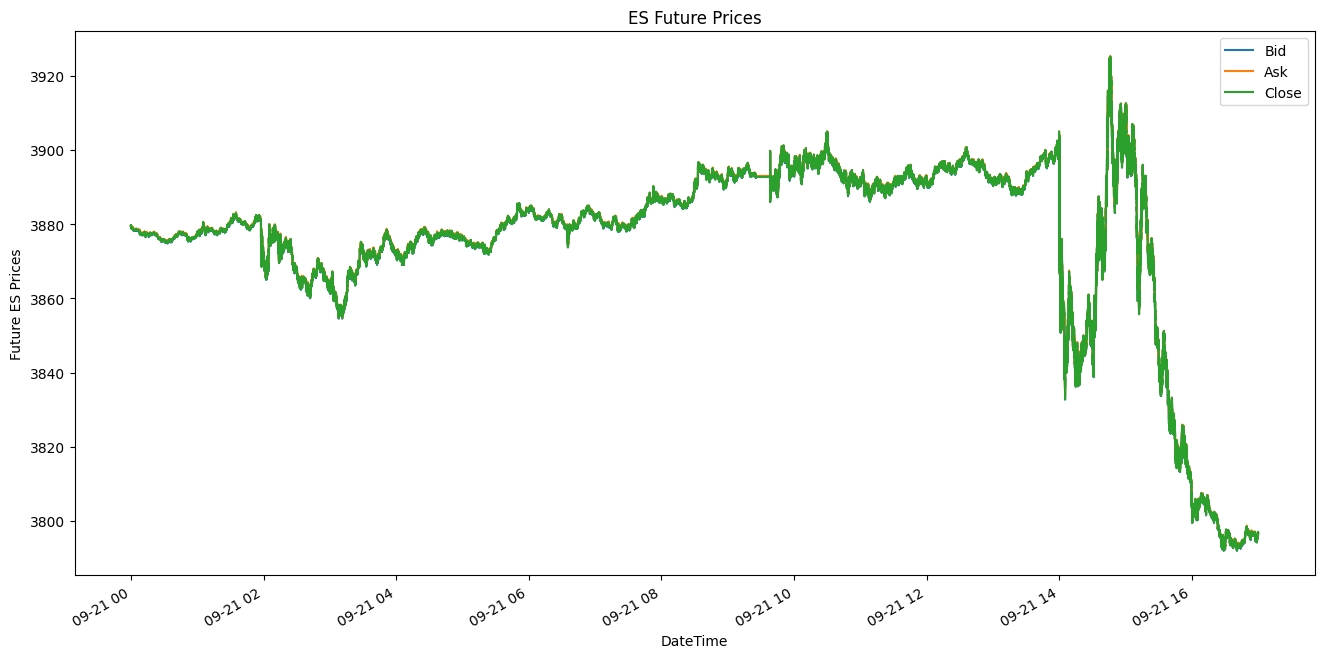

In [285]:
es.Bid.plot(label = 'Bid', figsize=(16,8))
es.Ask.plot(label= "Ask")
es.Close.plot(label= 'Close')
plt.legend()
plt.title('ES Future Prices')
plt.ylabel('Future ES Prices')
plt.show()

### Addinig extra derived features, e.g. MA's, aggregates, ratios...

In [ ]:
#  P(A|B) = P(B|A) * P(A)


#### Creating Model

In [191]:
# !pip install scikit_learn
from sklearn.ensemble import RandomForestClassifier

- random_state: keeps same results while rerunning each time 
- min_samples_split 200 : prevents overfitting of rules to data  
- n_estimators: how many decision trees to use & avrg the results of 100 decision trees 

In [192]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state= 1) # probably less then 500- try diff v
train = data.iloc[:-100] # take all but last 100 rows
test = data.iloc[-100:] # take last 100 rows

model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=200, random_state=1)

In [193]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [194]:
preds = pd.Series(preds, index= test.index)

In [195]:
preds.head()

Date
2022-04-20    1.0
2022-04-21    1.0
2022-04-22    0.0
2022-04-25    0.0
2022-04-26    1.0
dtype: float64

In [196]:
test['Target']

Date
2022-04-20    0.0
2022-04-21    0.0
2022-04-22    0.0
2022-04-25    1.0
2022-04-26    0.0
             ... 
2022-09-06    0.0
2022-09-07    1.0
2022-09-08    1.0
2022-09-09    1.0
2022-09-12    1.0
Name: Target, Length: 100, dtype: float64

In [198]:
type(preds)

pandas.core.series.Series

In [199]:
precision_score(test['Target'], preds)  #  0.4631578947368421

0.4631578947368421

In [200]:
combined = pd.concat({"Target": test['Target'], "Predictions": preds}, axis= 1)

In [201]:
combined

Target  Predictions
Date                           
2022-04-20     0.0          1.0
2022-04-21     0.0          1.0
2022-04-22     0.0          0.0
2022-04-25     1.0          0.0
2022-04-26     0.0          1.0
...            ...          ...
2022-09-06     0.0          1.0
2022-09-07     1.0          1.0
2022-09-08     1.0          1.0
2022-09-09     1.0          1.0
2022-09-12     1.0          1.0

[100 rows x 2 columns]

<AxesSubplot: xlabel='Date'>

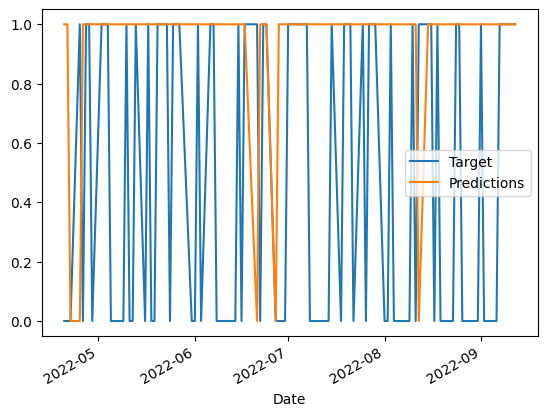

In [202]:
combined.plot()

### Creating a backtesting machine

In [203]:
train    # 1950-01-04   2022-04-19

Actual_Close  Target        Close         High         Open  \
Date                                                                      
1950-01-04     16.850000     1.0    16.660000    16.660000    16.660000   
1950-01-05     16.930000     1.0    16.850000    16.850000    16.850000   
1950-01-06     16.980000     1.0    16.930000    16.930000    16.930000   
1950-01-09     17.080000     1.0    16.980000    16.980000    16.980000   
1950-01-10     17.030001     0.0    17.080000    17.080000    17.080000   
...                  ...     ...          ...          ...          ...   
2022-04-12   4397.450195     0.0  4412.529785  4464.350098  4462.640137   
2022-04-13   4446.589844     1.0  4397.450195  4471.000000  4437.589844   
2022-04-14   4392.589844     0.0  4446.589844  4453.919922  4394.299805   
2022-04-18   4391.689941     0.0  4392.589844  4460.459961  4449.120117   
2022-04-19   4462.209961     1.0  4391.689941  4410.310059  4385.629883   

                    Low        Volume  
Date                                   
1950-01-04    16.660000  1.260000e+06  
1950-01-05    16.850000  1.890000e+06  
1950-01-06    16.930000  2.550000e+06  
1950-01-09    16.980000  2.010000e+06  
1950-01-10    17.080000  2.520000e+06  
...                 ...           ...  
2022-04-12  4408.379883  3.452540e+09  
2022-04-13  4381.339844  3.451990e+09  
2022-04-14  4392.700195  3.273140e+09  
2022-04-18  4390.770020  3.634740e+09  
2022-04-19  4370.299805  3.509340e+09  

[18191 rows x 7 columns]

In [204]:
test #  2022-04-20   2022-09-12

Actual_Close  Target        Close         High         Open  \
Date                                                                      
2022-04-20   4459.450195     0.0  4462.209961  4471.029785  4390.629883   
2022-04-21   4393.660156     0.0  4459.450195  4488.290039  4472.259766   
2022-04-22   4271.779785     0.0  4393.660156  4512.939941  4489.169922   
2022-04-25   4296.120117     1.0  4271.779785  4385.830078  4385.830078   
2022-04-26   4175.200195     0.0  4296.120117  4299.020020  4255.339844   
...                  ...     ...          ...          ...          ...   
2022-09-06   3908.189941     0.0  3924.260010  4018.429932  3994.659912   
2022-09-07   3979.870117     1.0  3908.189941  3942.550049  3930.889893   
2022-09-08   4006.179932     1.0  3979.870117  3987.889893  3909.429932   
2022-09-09   4067.360107     1.0  4006.179932  4010.500000  3959.939941   
2022-09-12   4107.279785     1.0  4067.360107  4076.810059  4022.939941   

                    Low        Volume  
Date                                   
2022-04-20  4390.629883  3.197930e+09  
2022-04-21  4448.759766  3.678040e+09  
2022-04-22  4384.470215  3.833570e+09  
2022-04-25  4267.620117  3.930660e+09  
2022-04-26  4200.819824  4.061070e+09  
...                 ...           ...  
2022-09-06  3906.209961  4.134920e+09  
2022-09-07  3886.750000  2.209800e+09  
2022-09-08  3906.030029  0.000000e+00  
2022-09-09  3944.810059  0.000000e+00  
2022-09-12  4022.939941  0.000000e+00  

[100 rows x 7 columns]

In [223]:
start = 1000
step = 750   # set to 100 for longer training and better predictions
def backtest(data, model, predictors, start, step):
    predictions = []

    for i in range(start, data.shape[0], step):
        
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy() 
        
        model.fit(train[predictors], train['Target'])
        
        
        preds = model.predict_proba(test[predictors])[:, 1]
        preds = pd.Series(preds, index= test.index)
        preds[preds > .6] = 1
        preds[preds <= .6] = 0
        
        combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis = 1)
        
        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions


In [226]:
pre = backtest(data, model, predictors, start, step)

In [244]:
precision_score(pre['Target'], pre['Predictions'])  #     0.5364469663902226

0.5364469663902226

In [228]:
pre['Predictions'].value_counts()

0.0    15000
1.0     2291
Name: Predictions, dtype: int64

In [ ]:
combined #   target & predictions next to each other in columns

### Further features for better predictions

In [230]:
weekly_mean = data.rolling(7).mean()

In [232]:
weekly_mean.shape

(18291, 7)

In [233]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

In [234]:
weekly_trend = data.shift(1).rolling(7).mean()['Target']  #  48 minute

In [238]:
data['weekly_mean'] = weekly_mean['Close'] / data['Close']
data['quarterly_mean'] = quarterly_mean['Close'] / data['Close']
data['annual_mean'] = annual_mean['Close'] / data['Close']

data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['quarterly_mean']
data['weekly_trend'] = weekly_trend

data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']

full_predictors = predictors = ['weekly_mean', 'annual_mean', 'annual_weekly_mean',
                                'annual_quarterly_mean', 'weekly_trend', 'open_close_ratio', 
                                'high_close_ratio','low_close_ratio']

In [240]:
predictions2 = backtest(data.iloc[365:], model, full_predictors, start, step)

In [241]:
predictions2

Target  Predictions
Date                           
1955-06-16     1.0          1.0
1955-06-17     1.0          1.0
1955-06-20     1.0          1.0
1955-06-21     1.0          1.0
1955-06-22     1.0          1.0
...            ...          ...
2022-09-06     0.0          0.0
2022-09-07     1.0          0.0
2022-09-08     1.0          0.0
2022-09-09     1.0          0.0
2022-09-12     1.0          0.0

[16926 rows x 2 columns]

In [242]:
precision_score(predictions2['Target'], predictions2['Predictions'])  #  0.5886491557223265

0.5886491557223265

#### Conclusion:
- Improved from  0.54  to 0.59 with more features. Remains experimentation w params and other features.

In [60]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    # print('Ratio_column is: ', ratio_column)
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    # print('sp500.column is: ',sp500[ratio_column])
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    # print("sp500[trend_column] ", sp500[trend_column])
    
    new_predictors += [ratio_column, trend_column]
    # print("New_predictors: ",  new_predictors )

New_predictors:  ['Close_Ratio_2', 'Trend_2']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000']


In [ ]:
new_predictors

In [64]:
sp500

Open         High          Low        Close      Volume  \
Date                                                                         
1950-01-03    16.660000    16.660000    16.660000    16.660000     1260000   
1950-01-04    16.850000    16.850000    16.850000    16.850000     1890000   
1950-01-05    16.930000    16.930000    16.930000    16.930000     2550000   
1950-01-06    16.980000    16.980000    16.980000    16.980000     2010000   
1950-01-09    17.080000    17.080000    17.080000    17.080000     2520000   
...                 ...          ...          ...          ...         ...   
2022-09-06  3930.889893  3942.550049  3886.750000  3908.189941  2209800080   
2022-09-07  3909.429932  3987.889893  3906.030029  3979.870117           0   
2022-09-08  3959.939941  4010.500000  3944.810059  4006.179932           0   
2022-09-09  4022.939941  4076.810059  4022.939941  4067.360107           0   
2022-09-12  4083.669922  4119.279785  4083.669922  4107.279785  1602969000   

               Tomorrow    Yesterday  Target  Close_Ratio_2  Trend_2  \
Date                                                                   
1950-01-03          NaN    16.850000       0            NaN      NaN   
1950-01-04    16.660000    16.930000       0       1.005670      NaN   
1950-01-05    16.850000    16.980000       0       1.002368      0.0   
1950-01-06    16.930000    17.080000       0       1.001474      0.0   
1950-01-09    16.980000    17.030001       0       1.002936      0.0   
...                 ...          ...     ...            ...      ...   
2022-09-06  3924.260010  3979.870117       1       0.997948      1.0   
2022-09-07  3908.189941  4006.179932       0       1.009087      2.0   
2022-09-08  3979.870117  4067.360107       0       1.003294      1.0   
2022-09-09  4006.179932  4107.279785       0       1.007578      0.0   
2022-09-12  4067.360107          NaN       0       1.004883      0.0   

            Close_Ratio_5  Trend_5  Close_Ratio_60  Trend_60  Close_Ratio_250  \
Date                                                                            
1950-01-03            NaN      NaN             NaN       NaN              NaN   
1950-01-04            NaN      NaN             NaN       NaN              NaN   
1950-01-05            NaN      NaN             NaN       NaN              NaN   
1950-01-06            NaN      NaN             NaN       NaN              NaN   
1950-01-09       1.010651      NaN             NaN       NaN              NaN   
...                   ...      ...             ...       ...              ...   
2022-09-06       0.989893      4.0        0.982136      34.0         0.902791   
2022-09-07       1.008370      4.0        0.999819      34.0         0.919786   
2022-09-08       1.012411      3.0        1.005349      33.0         0.926253   
2022-09-09       1.022676      2.0        1.019287      32.0         0.940748   
2022-09-12       1.023296      2.0        1.027929      31.0         0.950276   

            Trend_250  Close_Ratio_1000  Trend_1000  
Date                                                 
1950-01-03        NaN               NaN         NaN  
1950-01-04        NaN               NaN         NaN  
1950-01-05        NaN               NaN         NaN  
1950-01-06        NaN               NaN         NaN  
1950-01-09        NaN               NaN         NaN  
...               ...               ...         ...  
2022-09-06      130.0          1.103594       457.0  
2022-09-07      130.0          1.123489       458.0  
2022-09-08      129.0          1.130564       457.0  
2022-09-09      128.0          1.147454       457.0  
2022-09-12      128.0          1.158331       457.0  

[18292 rows x 18 columns]

In [69]:
sp500 = sp500.dropna(subset= sp500.columns[sp500.columns != "Tomorrow"])

In [70]:
sp500

Open         High          Low        Close      Volume  \
Date                                                                         
1954-01-05    25.100000    25.100000    25.100000    25.100000     1520000   
1954-01-06    25.139999    25.139999    25.139999    25.139999     1460000   
1954-01-07    25.059999    25.059999    25.059999    25.059999     1540000   
1954-01-08    24.930000    24.930000    24.930000    24.930000     1260000   
1954-01-11    24.799999    24.799999    24.799999    24.799999     1220000   
...                 ...          ...          ...          ...         ...   
2022-09-02  3994.659912  4018.429932  3906.209961  3924.260010  4134920000   
2022-09-06  3930.889893  3942.550049  3886.750000  3908.189941  2209800080   
2022-09-07  3909.429932  3987.889893  3906.030029  3979.870117           0   
2022-09-08  3959.939941  4010.500000  3944.810059  4006.179932           0   
2022-09-09  4022.939941  4076.810059  4022.939941  4067.360107           0   

               Tomorrow    Yesterday  Target  Close_Ratio_2  Trend_2  \
Date                                                                   
1954-01-05    24.950001    25.139999       0       1.002997      0.0   
1954-01-06    25.100000    25.059999       0       1.000796      0.0   
1954-01-07    25.139999    24.930000       1       0.998406      0.0   
1954-01-08    25.059999    24.799999       1       0.997399      1.0   
1954-01-11    24.930000    24.930000       1       0.997386      2.0   
...                 ...          ...     ...            ...      ...   
2022-09-02  3966.850098  3908.189941       1       0.994603      1.0   
2022-09-06  3924.260010  3979.870117       1       0.997948      1.0   
2022-09-07  3908.189941  4006.179932       0       1.009087      2.0   
2022-09-08  3979.870117  4067.360107       0       1.003294      1.0   
2022-09-09  4006.179932  4107.279785       0       1.007578      0.0   

            Close_Ratio_5  Trend_5  Close_Ratio_60  Trend_60  Close_Ratio_250  \
Date                                                                            
1954-01-05       1.010711      2.0        1.024490      24.0         1.016073   
1954-01-06       1.007534      1.0        1.024902      23.0         1.017895   
1954-01-07       1.001919      0.0        1.020615      22.0         1.014864   
1954-01-08       0.995766      1.0        1.014418      23.0         1.009788   
1954-01-11       0.991762      2.0        1.008349      24.0         1.004694   
...                   ...      ...             ...       ...              ...   
2022-09-02       0.987838      4.0        0.985722      34.0         0.905996   
2022-09-06       0.989893      4.0        0.982136      34.0         0.902791   
2022-09-07       1.008370      4.0        0.999819      34.0         0.919786   
2022-09-08       1.012411      3.0        1.005349      33.0         0.926253   
2022-09-09       1.022676      2.0        1.019287      32.0         0.940748   

            Trend_250  Close_Ratio_1000  Trend_1000  
Date                                                 
1954-01-05      119.0          1.115463       437.0  
1954-01-06      118.0          1.116829       437.0  
1954-01-07      117.0          1.112873       437.0  
1954-01-08      117.0          1.106709       438.0  
1954-01-11      117.0          1.100561       439.0  
...               ...               ...         ...  
2022-09-02      130.0          1.108446       456.0  
2022-09-06      130.0          1.103594       457.0  
2022-09-07      130.0          1.123489       458.0  
2022-09-08      129.0          1.130564       457.0  
2022-09-09      128.0          1.147454       457.0  

[17291 rows x 18 columns]

In [71]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [72]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[: , 1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis= 1)
    return combined

In [73]:
predictions = backtest(sp500, model, new_predictors)

In [77]:
predictions["Predictions"].value_counts()  #  0.0    7875     1.0    6916   ;

0.0    7875
1.0    6916
Name: Predictions, dtype: int64

In [78]:
precision_score(predictions["Target"], predictions["Predictions"])   #  0.5701863354037268   ;  1.0   ;

1.0

In [79]:
predictions["Target"].value_counts() / predictions.shape[0]   #   b1    0.546855   0    0.453145  ;  0    0.532013  1    0.467987  ;

0    0.532013
1    0.467987
Name: Target, dtype: float64

In [80]:
predictions

Target  Predictions
Date                           
1963-12-09       1          1.0
1963-12-10       0          0.0
1963-12-11       1          1.0
1963-12-12       0          0.0
1963-12-13       0          0.0
...            ...          ...
2022-09-02       1          1.0
2022-09-06       1          1.0
2022-09-07       0          0.0
2022-09-08       0          0.0
2022-09-09       0          0.0

[14791 rows x 2 columns]